In [1]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [2]:
data_cycle = 'all_condition_stat_cycle_filtered.csv'

In [3]:
data = pd.read_csv('./data/'+data_cycle)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300,down
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300,down
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300,down
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300,down
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215052,580.818322,3.133201,2.587196,2.310177,0.213215,13.073614,1.431366,1.851970,54.386073,44.422093,...,-0.219265,-2.766058,4.170769,0.553080,0.067663,4,6.0,5000,500,up
215053,582.032368,3.721833,2.669275,3.034522,0.380387,14.117784,1.681629,3.203336,57.948220,42.156799,...,-0.161040,-2.854631,3.320326,0.233940,-0.496502,4,6.0,5000,500,up
215054,583.426041,3.511822,2.444397,2.999400,0.492054,13.476082,1.526276,2.936469,55.148492,43.277311,...,-0.034108,-2.835090,3.020172,0.207604,-0.521229,4,6.0,5000,500,up
215055,580.350537,3.449806,2.239240,3.012830,0.292238,10.928611,1.126394,1.072886,58.075829,45.329429,...,-0.153948,-3.146117,2.982659,0.284559,-0.278496,4,6.0,5000,500,up


In [4]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

In [5]:
groups_feed = down.groupby('feed')

In [6]:
feed_300 = groups_feed.get_group(300)
feed_300 = feed_300.reset_index(drop=True)
feed_300 = feed_300.drop(['Milling_Type'], axis=1)

feed_350 = groups_feed.get_group(350)
feed_350 = feed_350.reset_index(drop=True)
feed_350 = feed_350.drop(['Milling_Type'], axis=1)

feed_400 = groups_feed.get_group(400)
feed_400 = feed_400.reset_index(drop=True)
feed_400 = feed_400.drop(['Milling_Type'], axis=1)

feed_450 = groups_feed.get_group(450)
feed_450 = feed_450.reset_index(drop=True)
feed_450 = feed_450.drop(['Milling_Type'], axis=1)

feed_500 = groups_feed.get_group(500)
feed_500 = feed_500.reset_index(drop=True)
feed_500 = feed_500.drop(['Milling_Type'], axis=1)

In [7]:
feed_300

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,66.346929,0.244161,0.283664,0.147595,0.005578,1.640208,2.684610,7.875414,74.921787,52.044972,...,0.135774,0.037162,-0.259393,0.419544,0.255735,-0.168187,1,1.0,3000,300
1,66.297981,0.245841,0.264163,0.166304,0.003941,1.631323,2.895762,9.944875,75.527169,52.062288,...,0.127980,-0.015675,-0.355162,0.402921,0.043373,0.438830,1,1.0,3000,300
2,66.577786,0.231463,0.255632,0.150313,0.010979,1.751155,2.908877,10.447245,75.933828,51.175746,...,0.133384,-0.068800,-0.342743,0.341331,0.139751,-0.499427,1,1.0,3000,300
3,66.980319,0.238938,0.260048,0.154622,0.008462,1.843098,2.843921,10.433196,75.827492,51.411571,...,0.142687,-0.017526,-0.364834,0.332737,0.036950,-0.528745,1,1.0,3000,300
4,67.546219,0.242432,0.259848,0.160682,0.007866,1.808103,2.874952,10.639415,75.726991,52.006348,...,0.146143,-0.060268,-0.388372,0.296290,-0.180871,-0.520753,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38765,435.505586,1.900791,1.335409,1.593195,0.059921,5.595245,0.773317,-0.286272,48.440140,40.586668,...,0.963828,0.043205,-2.027412,2.419946,0.003337,-0.460037,4,6.0,5000,300
38766,434.295416,1.654970,1.040526,1.452528,0.126165,4.593730,0.553744,-0.646352,45.372150,39.617690,...,0.973589,0.042040,-2.074132,2.743588,0.150797,-0.377022,4,6.0,5000,300
38767,434.406524,1.711198,1.227382,1.486870,0.106935,5.968664,0.938005,0.466089,49.222604,39.762852,...,0.917846,0.010093,-1.922719,2.317986,-0.020112,-0.517291,4,6.0,5000,300
38768,434.942812,1.935887,1.443359,1.608460,0.036845,5.693214,0.853396,-0.194054,45.247385,38.692716,...,0.934111,0.069127,-1.778551,2.072827,0.018830,-0.627888,4,6.0,5000,300


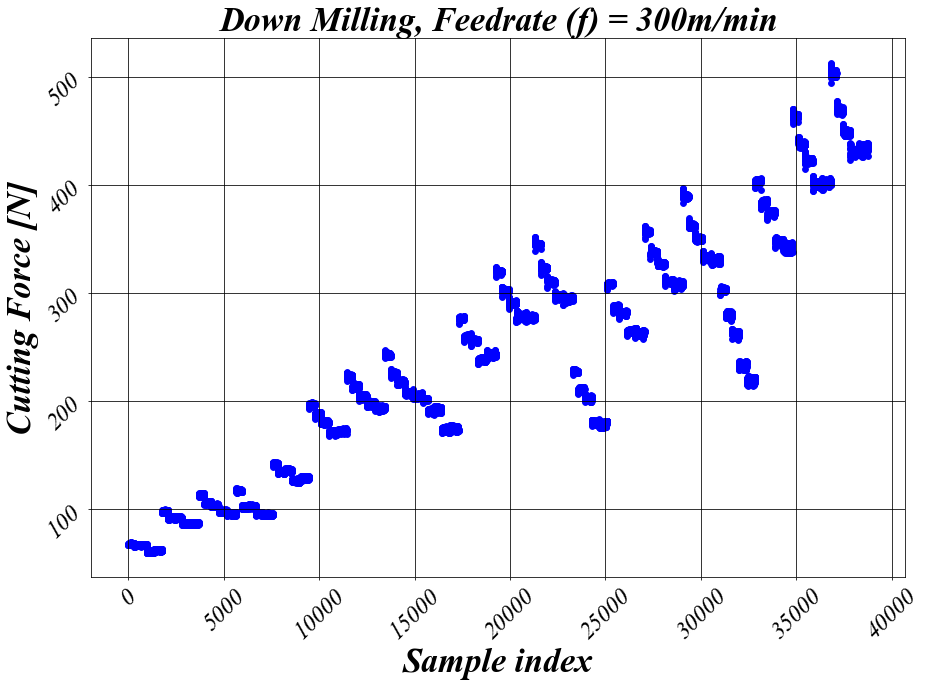

In [8]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 300m/min',**tfont)
plt.scatter(range(0, len(feed_300['RMS_CF_max'])), feed_300['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

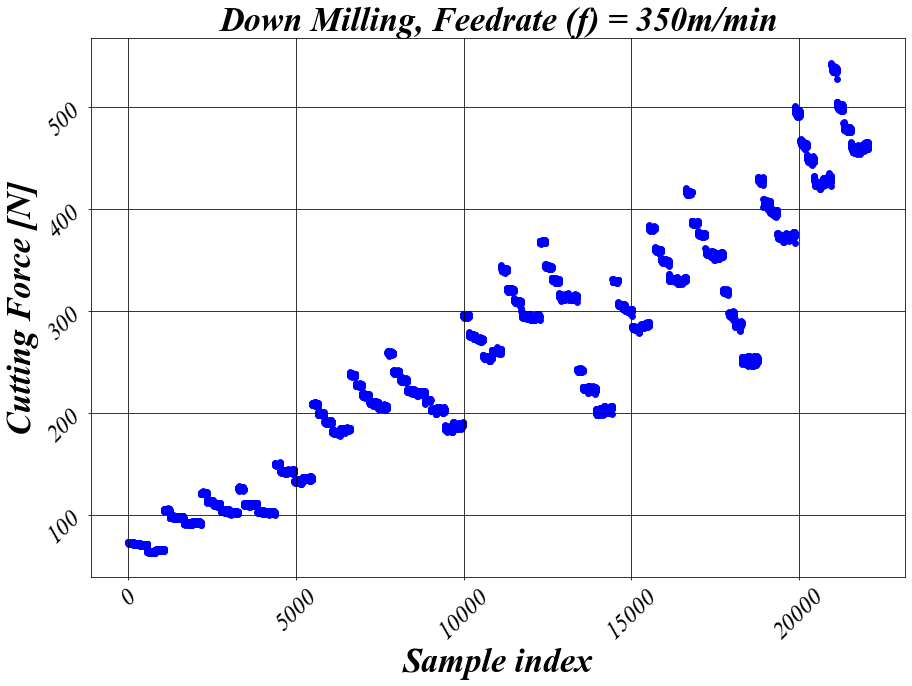

In [9]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 350m/min',**tfont)
plt.scatter(range(0, len(feed_350['RMS_CF_max'])), feed_350['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

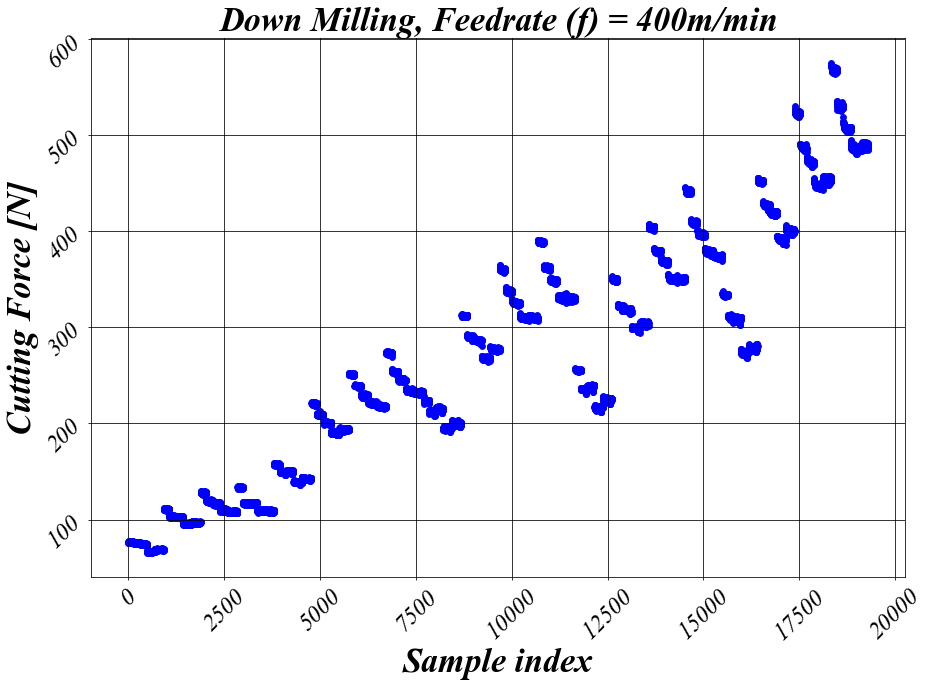

In [10]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 400m/min',**tfont)
plt.scatter(range(0, len(feed_400['RMS_CF_max'])), feed_400['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

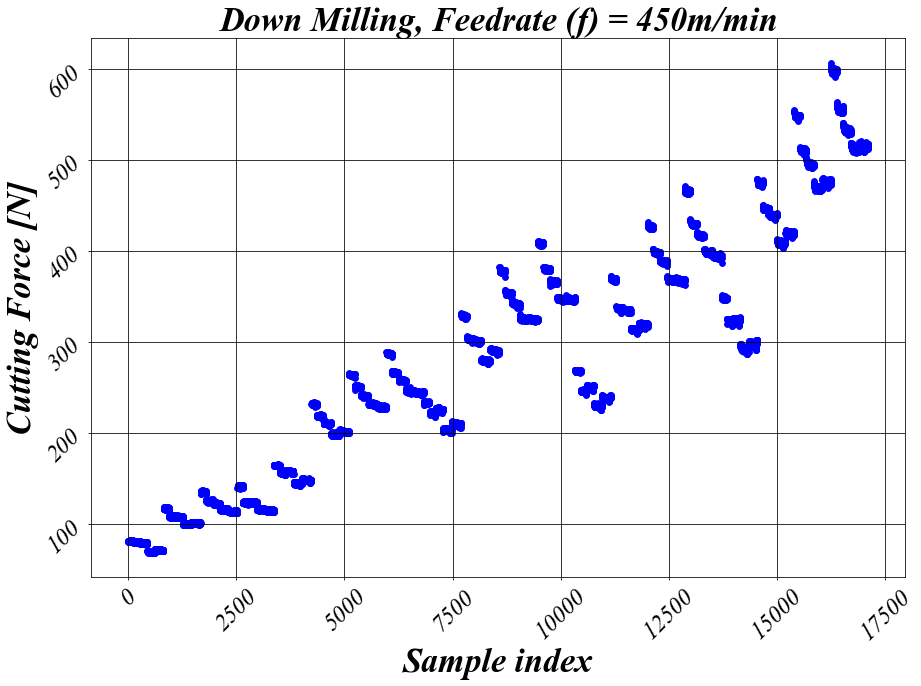

In [11]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 450m/min',**tfont)
plt.scatter(range(0, len(feed_450['RMS_CF_max'])), feed_450['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

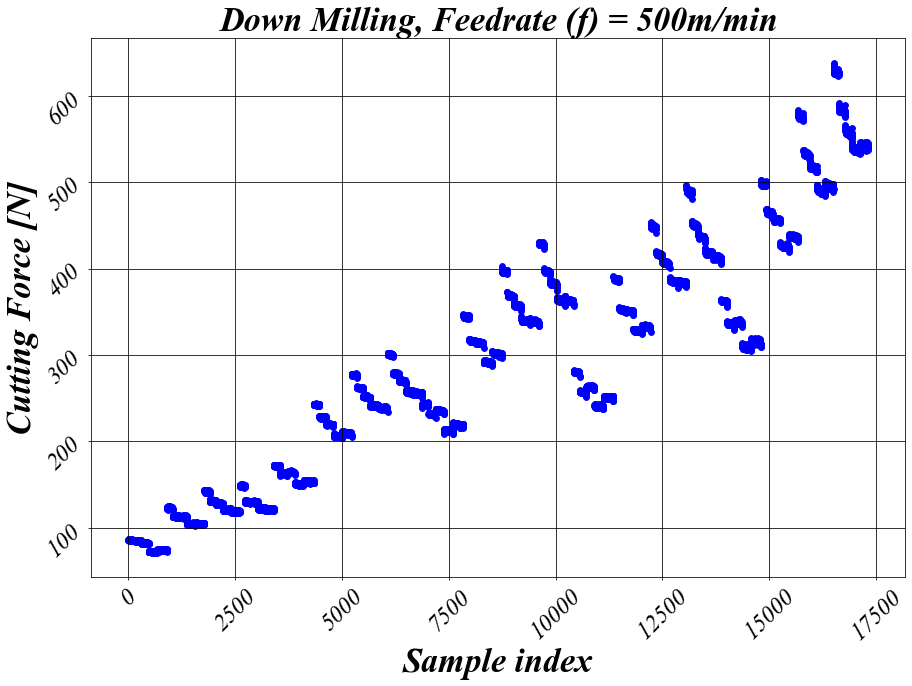

In [12]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Feedrate (f) = 500m/min',**tfont)
plt.scatter(range(0, len(feed_500['RMS_CF_max'])), feed_500['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

# ***feed 300 test***

In [13]:
train = pd.concat([feed_350, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [14]:
X_test = feed_300.iloc[: , 1:]
y_test = feed_300['RMS_CF_max']

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:298.61244	validation_0-mape:0.98758	validation_1-rmse:260.94858	validation_1-mape:0.98629
[1]	validation_0-rmse:295.63789	validation_0-mape:0.97768	validation_1-rmse:258.10879	validation_1-mape:0.97544
[2]	validation_0-rmse:292.69318	validation_0-mape:0.96788	validation_1-rmse:255.29444	validation_1-mape:0.96468
[3]	validation_0-rmse:289.77793	validation_0-mape:0.95818	validation_1-rmse:252.50694	validation_1-mape:0.95404
[4]	validation_0-rmse:286.89190	validation_0-mape:0.94858	validation_1-rmse:249.74538	validation_1-mape:0.94349
[5]	validation_0-rmse:284.03479	validation_0-mape:0.93907	validation_1-rmse:247.01632	validation_1-mape:0.93307
[6]	validation_0-rmse:281.20631	validation_0-mape:0.92966	validation_1-rmse:244.30632	validation_1-mape:0.92273
[7]	validation_0-rmse:278.40606	validation_0-mape:0.92034	validation_1-rmse:241.63514	validation_1-mape:0.91253
[8]	validation_0-rmse:275.63402	validation_0-mape:0.91112	validation_1-rmse:238.98645	validation_1-mape:

[73]	validation_0-rmse:144.03410	validation_0-mape:0.47310	validation_1-rmse:114.95556	validation_1-mape:0.42806
[74]	validation_0-rmse:142.60683	validation_0-mape:0.46835	validation_1-rmse:113.63143	validation_1-mape:0.42300
[75]	validation_0-rmse:141.19197	validation_0-mape:0.46365	validation_1-rmse:112.34946	validation_1-mape:0.41808
[76]	validation_0-rmse:139.79134	validation_0-mape:0.45899	validation_1-rmse:111.07759	validation_1-mape:0.41318
[77]	validation_0-rmse:138.40703	validation_0-mape:0.45438	validation_1-rmse:109.78117	validation_1-mape:0.40823
[78]	validation_0-rmse:137.03421	validation_0-mape:0.44982	validation_1-rmse:108.52863	validation_1-mape:0.40342
[79]	validation_0-rmse:135.67720	validation_0-mape:0.44530	validation_1-rmse:107.29086	validation_1-mape:0.39861
[80]	validation_0-rmse:134.33163	validation_0-mape:0.44083	validation_1-rmse:106.06448	validation_1-mape:0.39392
[81]	validation_0-rmse:132.99968	validation_0-mape:0.43640	validation_1-rmse:104.85374	validatio

[146]	validation_0-rmse:69.75162	validation_0-mape:0.22620	validation_1-rmse:48.21522	validation_1-mape:0.16988
[147]	validation_0-rmse:69.06515	validation_0-mape:0.22393	validation_1-rmse:47.60116	validation_1-mape:0.16749
[148]	validation_0-rmse:68.38584	validation_0-mape:0.22167	validation_1-rmse:47.02056	validation_1-mape:0.16520
[149]	validation_0-rmse:67.71276	validation_0-mape:0.21944	validation_1-rmse:46.43558	validation_1-mape:0.16294
[150]	validation_0-rmse:67.04708	validation_0-mape:0.21723	validation_1-rmse:45.87127	validation_1-mape:0.16070
[151]	validation_0-rmse:66.38802	validation_0-mape:0.21504	validation_1-rmse:45.29633	validation_1-mape:0.15844
[152]	validation_0-rmse:65.73486	validation_0-mape:0.21288	validation_1-rmse:44.73896	validation_1-mape:0.15625
[153]	validation_0-rmse:65.08921	validation_0-mape:0.21073	validation_1-rmse:44.19587	validation_1-mape:0.15408
[154]	validation_0-rmse:64.44952	validation_0-mape:0.20861	validation_1-rmse:43.63941	validation_1-mape:

[220]	validation_0-rmse:33.77232	validation_0-mape:0.10696	validation_1-rmse:18.64628	validation_1-mape:0.05263
[221]	validation_0-rmse:33.44684	validation_0-mape:0.10588	validation_1-rmse:18.41113	validation_1-mape:0.05172
[222]	validation_0-rmse:33.12486	validation_0-mape:0.10482	validation_1-rmse:18.17868	validation_1-mape:0.05080
[223]	validation_0-rmse:32.80616	validation_0-mape:0.10376	validation_1-rmse:17.94291	validation_1-mape:0.04989
[224]	validation_0-rmse:32.48970	validation_0-mape:0.10272	validation_1-rmse:17.71815	validation_1-mape:0.04901
[225]	validation_0-rmse:32.17728	validation_0-mape:0.10168	validation_1-rmse:17.49260	validation_1-mape:0.04814
[226]	validation_0-rmse:31.86806	validation_0-mape:0.10066	validation_1-rmse:17.27294	validation_1-mape:0.04730
[227]	validation_0-rmse:31.56097	validation_0-mape:0.09965	validation_1-rmse:17.04521	validation_1-mape:0.04642
[228]	validation_0-rmse:31.25816	validation_0-mape:0.09865	validation_1-rmse:16.82920	validation_1-mape:

[294]	validation_0-rmse:16.76169	validation_0-mape:0.05073	validation_1-rmse:9.28472	validation_1-mape:0.02437
[295]	validation_0-rmse:16.60863	validation_0-mape:0.05023	validation_1-rmse:9.26313	validation_1-mape:0.02449
[296]	validation_0-rmse:16.45731	validation_0-mape:0.04973	validation_1-rmse:9.23819	validation_1-mape:0.02460
[297]	validation_0-rmse:16.30750	validation_0-mape:0.04924	validation_1-rmse:9.21946	validation_1-mape:0.02473
[298]	validation_0-rmse:16.15938	validation_0-mape:0.04875	validation_1-rmse:9.20523	validation_1-mape:0.02486
[299]	validation_0-rmse:16.01346	validation_0-mape:0.04826	validation_1-rmse:9.17610	validation_1-mape:0.02497
[300]	validation_0-rmse:15.86852	validation_0-mape:0.04778	validation_1-rmse:9.15983	validation_1-mape:0.02511
[301]	validation_0-rmse:15.72493	validation_0-mape:0.04731	validation_1-rmse:9.14851	validation_1-mape:0.02525
[302]	validation_0-rmse:15.58318	validation_0-mape:0.04684	validation_1-rmse:9.14046	validation_1-mape:0.02540
[

[368]	validation_0-rmse:8.93675	validation_0-mape:0.02483	validation_1-rmse:10.20004	validation_1-mape:0.03667
[369]	validation_0-rmse:8.86951	validation_0-mape:0.02460	validation_1-rmse:10.22852	validation_1-mape:0.03683
[370]	validation_0-rmse:8.80313	validation_0-mape:0.02438	validation_1-rmse:10.25802	validation_1-mape:0.03699
[371]	validation_0-rmse:8.73740	validation_0-mape:0.02417	validation_1-rmse:10.28761	validation_1-mape:0.03715
[372]	validation_0-rmse:8.67236	validation_0-mape:0.02395	validation_1-rmse:10.32047	validation_1-mape:0.03732
[373]	validation_0-rmse:8.60828	validation_0-mape:0.02374	validation_1-rmse:10.34707	validation_1-mape:0.03748
[374]	validation_0-rmse:8.54482	validation_0-mape:0.02353	validation_1-rmse:10.37906	validation_1-mape:0.03765
[375]	validation_0-rmse:8.48217	validation_0-mape:0.02332	validation_1-rmse:10.40834	validation_1-mape:0.03780
[376]	validation_0-rmse:8.42013	validation_0-mape:0.02312	validation_1-rmse:10.44110	validation_1-mape:0.03797
[

[442]	validation_0-rmse:5.63361	validation_0-mape:0.01414	validation_1-rmse:12.05102	validation_1-mape:0.04596
[443]	validation_0-rmse:5.60723	validation_0-mape:0.01406	validation_1-rmse:12.07192	validation_1-mape:0.04605
[444]	validation_0-rmse:5.58054	validation_0-mape:0.01398	validation_1-rmse:12.09345	validation_1-mape:0.04615
[445]	validation_0-rmse:5.55484	validation_0-mape:0.01390	validation_1-rmse:12.10826	validation_1-mape:0.04623
[446]	validation_0-rmse:5.52958	validation_0-mape:0.01382	validation_1-rmse:12.12741	validation_1-mape:0.04631
[447]	validation_0-rmse:5.50422	validation_0-mape:0.01375	validation_1-rmse:12.14432	validation_1-mape:0.04640
[448]	validation_0-rmse:5.47969	validation_0-mape:0.01367	validation_1-rmse:12.16248	validation_1-mape:0.04648
[449]	validation_0-rmse:5.45523	validation_0-mape:0.01359	validation_1-rmse:12.17850	validation_1-mape:0.04656
[450]	validation_0-rmse:5.43099	validation_0-mape:0.01352	validation_1-rmse:12.19877	validation_1-mape:0.04665
[

[516]	validation_0-rmse:4.38222	validation_0-mape:0.01043	validation_1-rmse:13.06610	validation_1-mape:0.05065
[517]	validation_0-rmse:4.37147	validation_0-mape:0.01040	validation_1-rmse:13.07634	validation_1-mape:0.05069
[518]	validation_0-rmse:4.36030	validation_0-mape:0.01037	validation_1-rmse:13.08603	validation_1-mape:0.05074
[519]	validation_0-rmse:4.35092	validation_0-mape:0.01035	validation_1-rmse:13.09392	validation_1-mape:0.05078
[520]	validation_0-rmse:4.34158	validation_0-mape:0.01032	validation_1-rmse:13.10206	validation_1-mape:0.05082
[521]	validation_0-rmse:4.33085	validation_0-mape:0.01029	validation_1-rmse:13.11168	validation_1-mape:0.05087
[522]	validation_0-rmse:4.32092	validation_0-mape:0.01027	validation_1-rmse:13.11843	validation_1-mape:0.05089
[523]	validation_0-rmse:4.31210	validation_0-mape:0.01024	validation_1-rmse:13.12653	validation_1-mape:0.05094
[524]	validation_0-rmse:4.30216	validation_0-mape:0.01022	validation_1-rmse:13.13440	validation_1-mape:0.05096
[

[590]	validation_0-rmse:3.85785	validation_0-mape:0.00915	validation_1-rmse:13.53487	validation_1-mape:0.05288
[591]	validation_0-rmse:3.85272	validation_0-mape:0.00914	validation_1-rmse:13.53946	validation_1-mape:0.05290
[592]	validation_0-rmse:3.84739	validation_0-mape:0.00913	validation_1-rmse:13.54394	validation_1-mape:0.05293
[593]	validation_0-rmse:3.84260	validation_0-mape:0.00912	validation_1-rmse:13.54633	validation_1-mape:0.05294
[594]	validation_0-rmse:3.83799	validation_0-mape:0.00911	validation_1-rmse:13.55193	validation_1-mape:0.05296
[595]	validation_0-rmse:3.83266	validation_0-mape:0.00910	validation_1-rmse:13.55628	validation_1-mape:0.05299
[596]	validation_0-rmse:3.82818	validation_0-mape:0.00909	validation_1-rmse:13.55950	validation_1-mape:0.05301
[597]	validation_0-rmse:3.82361	validation_0-mape:0.00908	validation_1-rmse:13.56229	validation_1-mape:0.05302
[598]	validation_0-rmse:3.81888	validation_0-mape:0.00907	validation_1-rmse:13.56691	validation_1-mape:0.05304
[

[664]	validation_0-rmse:3.58093	validation_0-mape:0.00863	validation_1-rmse:13.73848	validation_1-mape:0.05389
[665]	validation_0-rmse:3.57831	validation_0-mape:0.00862	validation_1-rmse:13.74115	validation_1-mape:0.05390
[666]	validation_0-rmse:3.57589	validation_0-mape:0.00862	validation_1-rmse:13.74085	validation_1-mape:0.05391
[667]	validation_0-rmse:3.57281	validation_0-mape:0.00861	validation_1-rmse:13.74376	validation_1-mape:0.05392
[668]	validation_0-rmse:3.57059	validation_0-mape:0.00861	validation_1-rmse:13.74395	validation_1-mape:0.05392
[669]	validation_0-rmse:3.56811	validation_0-mape:0.00861	validation_1-rmse:13.74634	validation_1-mape:0.05393
[670]	validation_0-rmse:3.56581	validation_0-mape:0.00860	validation_1-rmse:13.74659	validation_1-mape:0.05393
[671]	validation_0-rmse:3.56352	validation_0-mape:0.00860	validation_1-rmse:13.74736	validation_1-mape:0.05393
[672]	validation_0-rmse:3.56066	validation_0-mape:0.00859	validation_1-rmse:13.75054	validation_1-mape:0.05395
[

[738]	validation_0-rmse:3.41906	validation_0-mape:0.00835	validation_1-rmse:13.81566	validation_1-mape:0.05424
[739]	validation_0-rmse:3.41754	validation_0-mape:0.00834	validation_1-rmse:13.81472	validation_1-mape:0.05424
[740]	validation_0-rmse:3.41465	validation_0-mape:0.00834	validation_1-rmse:13.81695	validation_1-mape:0.05425
[741]	validation_0-rmse:3.41291	validation_0-mape:0.00834	validation_1-rmse:13.81606	validation_1-mape:0.05425
[742]	validation_0-rmse:3.41145	validation_0-mape:0.00833	validation_1-rmse:13.81806	validation_1-mape:0.05426
[743]	validation_0-rmse:3.40982	validation_0-mape:0.00833	validation_1-rmse:13.81746	validation_1-mape:0.05426
[744]	validation_0-rmse:3.40780	validation_0-mape:0.00833	validation_1-rmse:13.81940	validation_1-mape:0.05427
[745]	validation_0-rmse:3.40621	validation_0-mape:0.00832	validation_1-rmse:13.81879	validation_1-mape:0.05426
[746]	validation_0-rmse:3.40405	validation_0-mape:0.00832	validation_1-rmse:13.82080	validation_1-mape:0.05427
[

[812]	validation_0-rmse:3.29089	validation_0-mape:0.00810	validation_1-rmse:13.85455	validation_1-mape:0.05445
[813]	validation_0-rmse:3.28868	validation_0-mape:0.00810	validation_1-rmse:13.85582	validation_1-mape:0.05446
[814]	validation_0-rmse:3.28753	validation_0-mape:0.00809	validation_1-rmse:13.85641	validation_1-mape:0.05446
[815]	validation_0-rmse:3.28580	validation_0-mape:0.00809	validation_1-rmse:13.85644	validation_1-mape:0.05446
[816]	validation_0-rmse:3.28358	validation_0-mape:0.00809	validation_1-rmse:13.85896	validation_1-mape:0.05447
[817]	validation_0-rmse:3.28227	validation_0-mape:0.00808	validation_1-rmse:13.85843	validation_1-mape:0.05447
[818]	validation_0-rmse:3.28017	validation_0-mape:0.00808	validation_1-rmse:13.86018	validation_1-mape:0.05448
[819]	validation_0-rmse:3.27822	validation_0-mape:0.00808	validation_1-rmse:13.86249	validation_1-mape:0.05448
[820]	validation_0-rmse:3.27681	validation_0-mape:0.00808	validation_1-rmse:13.86195	validation_1-mape:0.05448
[

[886]	validation_0-rmse:3.17602	validation_0-mape:0.00788	validation_1-rmse:13.88058	validation_1-mape:0.05456
[887]	validation_0-rmse:3.17454	validation_0-mape:0.00788	validation_1-rmse:13.88097	validation_1-mape:0.05456
[888]	validation_0-rmse:3.17372	validation_0-mape:0.00788	validation_1-rmse:13.88096	validation_1-mape:0.05456
[889]	validation_0-rmse:3.17221	validation_0-mape:0.00788	validation_1-rmse:13.87976	validation_1-mape:0.05456
[890]	validation_0-rmse:3.17139	validation_0-mape:0.00787	validation_1-rmse:13.87963	validation_1-mape:0.05456
[891]	validation_0-rmse:3.16987	validation_0-mape:0.00787	validation_1-rmse:13.88079	validation_1-mape:0.05456
[892]	validation_0-rmse:3.16804	validation_0-mape:0.00787	validation_1-rmse:13.88125	validation_1-mape:0.05457
[893]	validation_0-rmse:3.16676	validation_0-mape:0.00787	validation_1-rmse:13.87981	validation_1-mape:0.05456
[894]	validation_0-rmse:3.16582	validation_0-mape:0.00786	validation_1-rmse:13.87980	validation_1-mape:0.05456
[

[960]	validation_0-rmse:3.07128	validation_0-mape:0.00768	validation_1-rmse:13.89822	validation_1-mape:0.05464
[961]	validation_0-rmse:3.06940	validation_0-mape:0.00768	validation_1-rmse:13.89984	validation_1-mape:0.05465
[962]	validation_0-rmse:3.06811	validation_0-mape:0.00768	validation_1-rmse:13.90093	validation_1-mape:0.05465
[963]	validation_0-rmse:3.06651	validation_0-mape:0.00768	validation_1-rmse:13.90179	validation_1-mape:0.05466
[964]	validation_0-rmse:3.06536	validation_0-mape:0.00767	validation_1-rmse:13.90132	validation_1-mape:0.05466
[965]	validation_0-rmse:3.06403	validation_0-mape:0.00767	validation_1-rmse:13.90172	validation_1-mape:0.05466
[966]	validation_0-rmse:3.06234	validation_0-mape:0.00767	validation_1-rmse:13.90250	validation_1-mape:0.05466
[967]	validation_0-rmse:3.06157	validation_0-mape:0.00767	validation_1-rmse:13.90187	validation_1-mape:0.05466
[968]	validation_0-rmse:3.06025	validation_0-mape:0.00766	validation_1-rmse:13.90206	validation_1-mape:0.05466
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.0195
Train MAPE: 0.7581
Test RMSE: 13.9089
Test MAPE: 5.4709


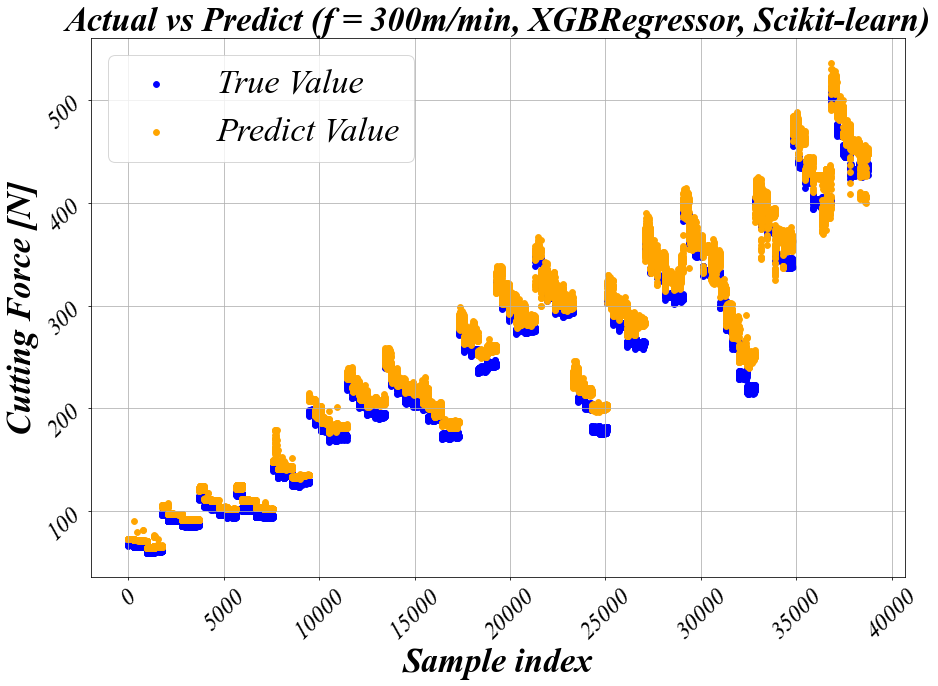

In [18]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 300m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

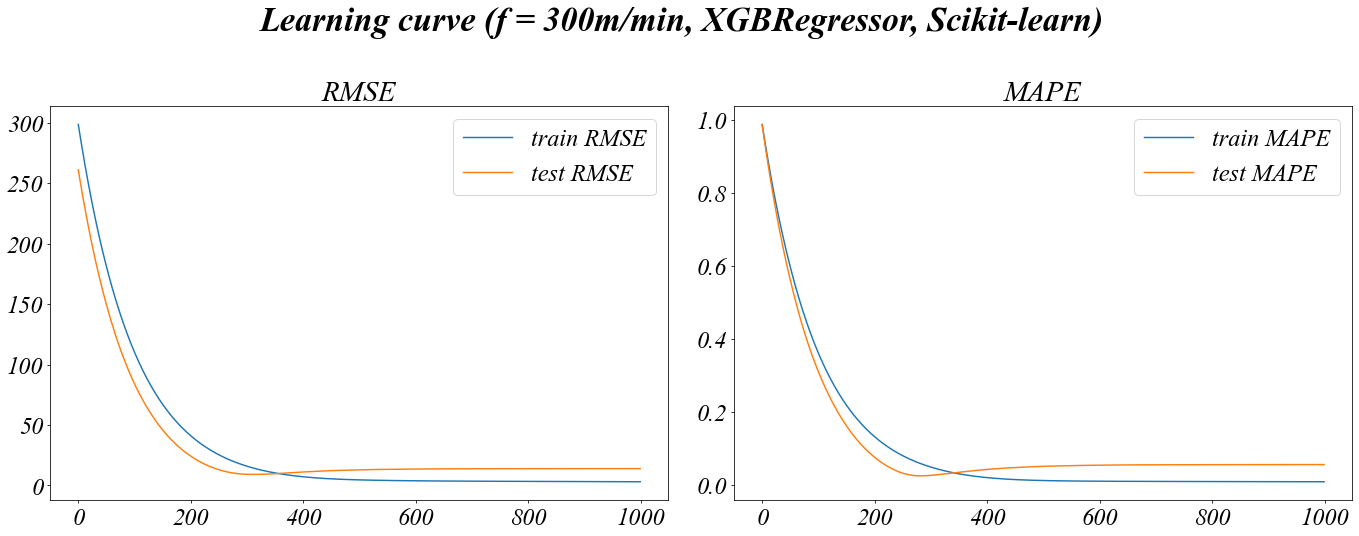

In [19]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 300m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 300_cycle.png")

# ***feed 350 test***

In [20]:
train = pd.concat([feed_300, feed_400, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [21]:
X_test = feed_350.iloc[: , 1:]
y_test = feed_350['RMS_CF_max']

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:288.69397	validation_0-mape:0.98746	validation_1-rmse:277.00230	validation_1-mape:0.98691
[1]	validation_0-rmse:285.82451	validation_0-mape:0.97753	validation_1-rmse:274.12824	validation_1-mape:0.97654
[2]	validation_0-rmse:282.98324	validation_0-mape:0.96771	validation_1-rmse:271.28006	validation_1-mape:0.96625
[3]	validation_0-rmse:280.17105	validation_0-mape:0.95798	validation_1-rmse:268.45923	validation_1-mape:0.95607
[4]	validation_0-rmse:277.38655	validation_0-mape:0.94835	validation_1-rmse:265.66846	validation_1-mape:0.94600
[5]	validation_0-rmse:274.62974	validation_0-mape:0.93882	validation_1-rmse:262.90943	validation_1-mape:0.93603
[6]	validation_0-rmse:271.90124	validation_0-mape:0.92938	validation_1-rmse:260.17402	validation_1-mape:0.92615
[7]	validation_0-rmse:269.19932	validation_0-mape:0.92004	validation_1-rmse:257.46997	validation_1-mape:0.91638
[8]	validation_0-rmse:266.52326	validation_0-mape:0.91080	validation_1-rmse:254.78700	validation_1-mape:

[73]	validation_0-rmse:139.51408	validation_0-mape:0.47189	validation_1-rmse:129.39199	validation_1-mape:0.45358
[74]	validation_0-rmse:138.13587	validation_0-mape:0.46712	validation_1-rmse:128.03564	validation_1-mape:0.44875
[75]	validation_0-rmse:136.77141	validation_0-mape:0.46241	validation_1-rmse:126.70664	validation_1-mape:0.44390
[76]	validation_0-rmse:135.41989	validation_0-mape:0.45776	validation_1-rmse:125.38857	validation_1-mape:0.43906
[77]	validation_0-rmse:134.08273	validation_0-mape:0.45314	validation_1-rmse:124.07222	validation_1-mape:0.43437
[78]	validation_0-rmse:132.75905	validation_0-mape:0.44857	validation_1-rmse:122.78438	validation_1-mape:0.42967
[79]	validation_0-rmse:131.44897	validation_0-mape:0.44404	validation_1-rmse:121.50023	validation_1-mape:0.42508
[80]	validation_0-rmse:130.15194	validation_0-mape:0.43956	validation_1-rmse:120.22204	validation_1-mape:0.42053
[81]	validation_0-rmse:128.86604	validation_0-mape:0.43513	validation_1-rmse:118.96503	validatio

[146]	validation_0-rmse:67.75159	validation_0-mape:0.22531	validation_1-rmse:58.82389	validation_1-mape:0.19930
[147]	validation_0-rmse:67.08671	validation_0-mape:0.22305	validation_1-rmse:58.14960	validation_1-mape:0.19691
[148]	validation_0-rmse:66.42990	validation_0-mape:0.22080	validation_1-rmse:57.52933	validation_1-mape:0.19465
[149]	validation_0-rmse:65.78041	validation_0-mape:0.21857	validation_1-rmse:56.90951	validation_1-mape:0.19239
[150]	validation_0-rmse:65.13613	validation_0-mape:0.21637	validation_1-rmse:56.26922	validation_1-mape:0.19009
[151]	validation_0-rmse:64.49877	validation_0-mape:0.21419	validation_1-rmse:55.68007	validation_1-mape:0.18791
[152]	validation_0-rmse:63.86761	validation_0-mape:0.21204	validation_1-rmse:55.05451	validation_1-mape:0.18569
[153]	validation_0-rmse:63.24319	validation_0-mape:0.20990	validation_1-rmse:54.45844	validation_1-mape:0.18350
[154]	validation_0-rmse:62.62536	validation_0-mape:0.20779	validation_1-rmse:53.85706	validation_1-mape:

[220]	validation_0-rmse:32.97298	validation_0-mape:0.10657	validation_1-rmse:25.52341	validation_1-mape:0.07801
[221]	validation_0-rmse:32.65977	validation_0-mape:0.10550	validation_1-rmse:25.23731	validation_1-mape:0.07695
[222]	validation_0-rmse:32.34732	validation_0-mape:0.10444	validation_1-rmse:24.95473	validation_1-mape:0.07590
[223]	validation_0-rmse:32.03815	validation_0-mape:0.10339	validation_1-rmse:24.68268	validation_1-mape:0.07490
[224]	validation_0-rmse:31.73448	validation_0-mape:0.10235	validation_1-rmse:24.39935	validation_1-mape:0.07381
[225]	validation_0-rmse:31.43165	validation_0-mape:0.10132	validation_1-rmse:24.13456	validation_1-mape:0.07283
[226]	validation_0-rmse:31.13416	validation_0-mape:0.10030	validation_1-rmse:23.86406	validation_1-mape:0.07183
[227]	validation_0-rmse:30.83972	validation_0-mape:0.09930	validation_1-rmse:23.58421	validation_1-mape:0.07081
[228]	validation_0-rmse:30.54611	validation_0-mape:0.09830	validation_1-rmse:23.32514	validation_1-mape:

[294]	validation_0-rmse:16.61777	validation_0-mape:0.05087	validation_1-rmse:11.57093	validation_1-mape:0.02840
[295]	validation_0-rmse:16.47287	validation_0-mape:0.05037	validation_1-rmse:11.47596	validation_1-mape:0.02813
[296]	validation_0-rmse:16.32906	validation_0-mape:0.04988	validation_1-rmse:11.38351	validation_1-mape:0.02786
[297]	validation_0-rmse:16.18665	validation_0-mape:0.04940	validation_1-rmse:11.27682	validation_1-mape:0.02757
[298]	validation_0-rmse:16.04563	validation_0-mape:0.04892	validation_1-rmse:11.18653	validation_1-mape:0.02731
[299]	validation_0-rmse:15.90631	validation_0-mape:0.04844	validation_1-rmse:11.08398	validation_1-mape:0.02704
[300]	validation_0-rmse:15.76898	validation_0-mape:0.04797	validation_1-rmse:11.00034	validation_1-mape:0.02680
[301]	validation_0-rmse:15.63324	validation_0-mape:0.04750	validation_1-rmse:10.91348	validation_1-mape:0.02658
[302]	validation_0-rmse:15.49836	validation_0-mape:0.04704	validation_1-rmse:10.81745	validation_1-mape:

[368]	validation_0-rmse:9.28282	validation_0-mape:0.02592	validation_1-rmse:8.56780	validation_1-mape:0.02347
[369]	validation_0-rmse:9.22158	validation_0-mape:0.02571	validation_1-rmse:8.56605	validation_1-mape:0.02353
[370]	validation_0-rmse:9.15978	validation_0-mape:0.02551	validation_1-rmse:8.56530	validation_1-mape:0.02358
[371]	validation_0-rmse:9.09912	validation_0-mape:0.02531	validation_1-rmse:8.56824	validation_1-mape:0.02364
[372]	validation_0-rmse:9.03930	validation_0-mape:0.02511	validation_1-rmse:8.56690	validation_1-mape:0.02369
[373]	validation_0-rmse:8.98107	validation_0-mape:0.02491	validation_1-rmse:8.56742	validation_1-mape:0.02374
[374]	validation_0-rmse:8.92258	validation_0-mape:0.02472	validation_1-rmse:8.57129	validation_1-mape:0.02380
[375]	validation_0-rmse:8.86481	validation_0-mape:0.02453	validation_1-rmse:8.57507	validation_1-mape:0.02386
[376]	validation_0-rmse:8.80694	validation_0-mape:0.02434	validation_1-rmse:8.57729	validation_1-mape:0.02392
[377]	vali

[443]	validation_0-rmse:6.26266	validation_0-mape:0.01619	validation_1-rmse:9.34220	validation_1-mape:0.02832
[444]	validation_0-rmse:6.23901	validation_0-mape:0.01612	validation_1-rmse:9.35493	validation_1-mape:0.02838
[445]	validation_0-rmse:6.21636	validation_0-mape:0.01605	validation_1-rmse:9.36556	validation_1-mape:0.02843
[446]	validation_0-rmse:6.19323	validation_0-mape:0.01598	validation_1-rmse:9.38182	validation_1-mape:0.02850
[447]	validation_0-rmse:6.16978	validation_0-mape:0.01591	validation_1-rmse:9.39045	validation_1-mape:0.02855
[448]	validation_0-rmse:6.14745	validation_0-mape:0.01584	validation_1-rmse:9.40417	validation_1-mape:0.02861
[449]	validation_0-rmse:6.12551	validation_0-mape:0.01577	validation_1-rmse:9.41548	validation_1-mape:0.02867
[450]	validation_0-rmse:6.10385	validation_0-mape:0.01571	validation_1-rmse:9.43178	validation_1-mape:0.02873
[451]	validation_0-rmse:6.08152	validation_0-mape:0.01564	validation_1-rmse:9.43993	validation_1-mape:0.02879
[452]	vali

[518]	validation_0-rmse:5.10346	validation_0-mape:0.01290	validation_1-rmse:10.11915	validation_1-mape:0.03215
[519]	validation_0-rmse:5.09288	validation_0-mape:0.01288	validation_1-rmse:10.12463	validation_1-mape:0.03218
[520]	validation_0-rmse:5.08389	validation_0-mape:0.01286	validation_1-rmse:10.13339	validation_1-mape:0.03222
[521]	validation_0-rmse:5.07530	validation_0-mape:0.01283	validation_1-rmse:10.14415	validation_1-mape:0.03227
[522]	validation_0-rmse:5.06509	validation_0-mape:0.01281	validation_1-rmse:10.14909	validation_1-mape:0.03230
[523]	validation_0-rmse:5.05629	validation_0-mape:0.01278	validation_1-rmse:10.16084	validation_1-mape:0.03236
[524]	validation_0-rmse:5.04842	validation_0-mape:0.01276	validation_1-rmse:10.16639	validation_1-mape:0.03238
[525]	validation_0-rmse:5.04045	validation_0-mape:0.01274	validation_1-rmse:10.17323	validation_1-mape:0.03241
[526]	validation_0-rmse:5.03176	validation_0-mape:0.01272	validation_1-rmse:10.17945	validation_1-mape:0.03244
[

[592]	validation_0-rmse:4.62302	validation_0-mape:0.01179	validation_1-rmse:10.56734	validation_1-mape:0.03433
[593]	validation_0-rmse:4.61922	validation_0-mape:0.01178	validation_1-rmse:10.56959	validation_1-mape:0.03434
[594]	validation_0-rmse:4.61434	validation_0-mape:0.01177	validation_1-rmse:10.57628	validation_1-mape:0.03437
[595]	validation_0-rmse:4.61022	validation_0-mape:0.01176	validation_1-rmse:10.57925	validation_1-mape:0.03438
[596]	validation_0-rmse:4.60577	validation_0-mape:0.01175	validation_1-rmse:10.58277	validation_1-mape:0.03440
[597]	validation_0-rmse:4.60085	validation_0-mape:0.01174	validation_1-rmse:10.58686	validation_1-mape:0.03442
[598]	validation_0-rmse:4.59611	validation_0-mape:0.01173	validation_1-rmse:10.59578	validation_1-mape:0.03446
[599]	validation_0-rmse:4.59246	validation_0-mape:0.01172	validation_1-rmse:10.59776	validation_1-mape:0.03447
[600]	validation_0-rmse:4.58733	validation_0-mape:0.01171	validation_1-rmse:10.60138	validation_1-mape:0.03450
[

[666]	validation_0-rmse:4.35198	validation_0-mape:0.01121	validation_1-rmse:10.80884	validation_1-mape:0.03558
[667]	validation_0-rmse:4.34869	validation_0-mape:0.01121	validation_1-rmse:10.81325	validation_1-mape:0.03560
[668]	validation_0-rmse:4.34610	validation_0-mape:0.01120	validation_1-rmse:10.81465	validation_1-mape:0.03561
[669]	validation_0-rmse:4.34343	validation_0-mape:0.01119	validation_1-rmse:10.81323	validation_1-mape:0.03561
[670]	validation_0-rmse:4.33976	validation_0-mape:0.01119	validation_1-rmse:10.81801	validation_1-mape:0.03563
[671]	validation_0-rmse:4.33714	validation_0-mape:0.01118	validation_1-rmse:10.81748	validation_1-mape:0.03563
[672]	validation_0-rmse:4.33374	validation_0-mape:0.01117	validation_1-rmse:10.82236	validation_1-mape:0.03566
[673]	validation_0-rmse:4.33120	validation_0-mape:0.01117	validation_1-rmse:10.82183	validation_1-mape:0.03566
[674]	validation_0-rmse:4.32887	validation_0-mape:0.01116	validation_1-rmse:10.82466	validation_1-mape:0.03568
[

[740]	validation_0-rmse:4.16886	validation_0-mape:0.01082	validation_1-rmse:10.90859	validation_1-mape:0.03616
[741]	validation_0-rmse:4.16590	validation_0-mape:0.01082	validation_1-rmse:10.90882	validation_1-mape:0.03616
[742]	validation_0-rmse:4.16329	validation_0-mape:0.01081	validation_1-rmse:10.91007	validation_1-mape:0.03617
[743]	validation_0-rmse:4.16039	validation_0-mape:0.01081	validation_1-rmse:10.91028	validation_1-mape:0.03618
[744]	validation_0-rmse:4.15850	validation_0-mape:0.01080	validation_1-rmse:10.91096	validation_1-mape:0.03618
[745]	validation_0-rmse:4.15640	validation_0-mape:0.01080	validation_1-rmse:10.91043	validation_1-mape:0.03618
[746]	validation_0-rmse:4.15477	validation_0-mape:0.01080	validation_1-rmse:10.91250	validation_1-mape:0.03619
[747]	validation_0-rmse:4.15252	validation_0-mape:0.01079	validation_1-rmse:10.91218	validation_1-mape:0.03619
[748]	validation_0-rmse:4.15072	validation_0-mape:0.01079	validation_1-rmse:10.91143	validation_1-mape:0.03619
[

[814]	validation_0-rmse:4.01335	validation_0-mape:0.01051	validation_1-rmse:10.93655	validation_1-mape:0.03641
[815]	validation_0-rmse:4.01196	validation_0-mape:0.01051	validation_1-rmse:10.93639	validation_1-mape:0.03641
[816]	validation_0-rmse:4.01003	validation_0-mape:0.01050	validation_1-rmse:10.93612	validation_1-mape:0.03641
[817]	validation_0-rmse:4.00721	validation_0-mape:0.01050	validation_1-rmse:10.93630	validation_1-mape:0.03642
[818]	validation_0-rmse:4.00573	validation_0-mape:0.01049	validation_1-rmse:10.93660	validation_1-mape:0.03642
[819]	validation_0-rmse:4.00332	validation_0-mape:0.01049	validation_1-rmse:10.93738	validation_1-mape:0.03642
[820]	validation_0-rmse:4.00135	validation_0-mape:0.01048	validation_1-rmse:10.93653	validation_1-mape:0.03642
[821]	validation_0-rmse:3.99911	validation_0-mape:0.01048	validation_1-rmse:10.93637	validation_1-mape:0.03642
[822]	validation_0-rmse:3.99737	validation_0-mape:0.01048	validation_1-rmse:10.93802	validation_1-mape:0.03643
[

[888]	validation_0-rmse:3.87577	validation_0-mape:0.01022	validation_1-rmse:10.94513	validation_1-mape:0.03655
[889]	validation_0-rmse:3.87396	validation_0-mape:0.01022	validation_1-rmse:10.94513	validation_1-mape:0.03656
[890]	validation_0-rmse:3.87254	validation_0-mape:0.01022	validation_1-rmse:10.94708	validation_1-mape:0.03656
[891]	validation_0-rmse:3.87051	validation_0-mape:0.01021	validation_1-rmse:10.94737	validation_1-mape:0.03656
[892]	validation_0-rmse:3.86914	validation_0-mape:0.01021	validation_1-rmse:10.94694	validation_1-mape:0.03656
[893]	validation_0-rmse:3.86778	validation_0-mape:0.01021	validation_1-rmse:10.94554	validation_1-mape:0.03656
[894]	validation_0-rmse:3.86648	validation_0-mape:0.01021	validation_1-rmse:10.94486	validation_1-mape:0.03656
[895]	validation_0-rmse:3.86420	validation_0-mape:0.01020	validation_1-rmse:10.94461	validation_1-mape:0.03656
[896]	validation_0-rmse:3.86145	validation_0-mape:0.01020	validation_1-rmse:10.94537	validation_1-mape:0.03657
[

[962]	validation_0-rmse:3.75136	validation_0-mape:0.00995	validation_1-rmse:10.95617	validation_1-mape:0.03667
[963]	validation_0-rmse:3.75003	validation_0-mape:0.00995	validation_1-rmse:10.95491	validation_1-mape:0.03667
[964]	validation_0-rmse:3.74825	validation_0-mape:0.00995	validation_1-rmse:10.95704	validation_1-mape:0.03668
[965]	validation_0-rmse:3.74698	validation_0-mape:0.00994	validation_1-rmse:10.95667	validation_1-mape:0.03668
[966]	validation_0-rmse:3.74546	validation_0-mape:0.00994	validation_1-rmse:10.95598	validation_1-mape:0.03668
[967]	validation_0-rmse:3.74404	validation_0-mape:0.00994	validation_1-rmse:10.95764	validation_1-mape:0.03669
[968]	validation_0-rmse:3.74284	validation_0-mape:0.00994	validation_1-rmse:10.95684	validation_1-mape:0.03668
[969]	validation_0-rmse:3.74114	validation_0-mape:0.00993	validation_1-rmse:10.95972	validation_1-mape:0.03669
[970]	validation_0-rmse:3.73988	validation_0-mape:0.00993	validation_1-rmse:10.95926	validation_1-mape:0.03669
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [24]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.6952
Train MAPE: 0.9833
Test RMSE: 10.9653
Test MAPE: 3.6743


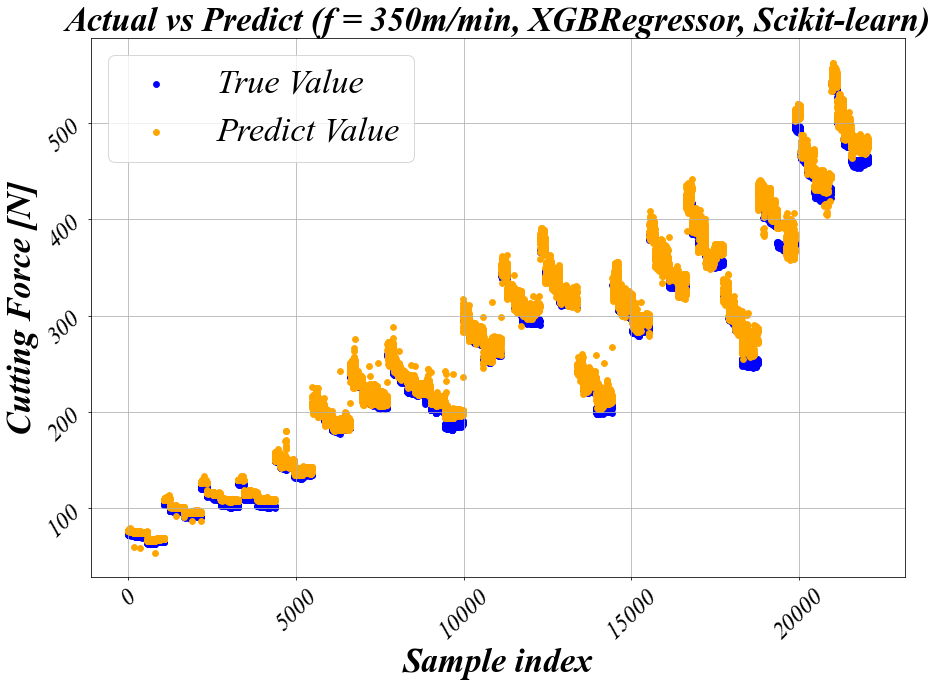

In [25]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 350m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

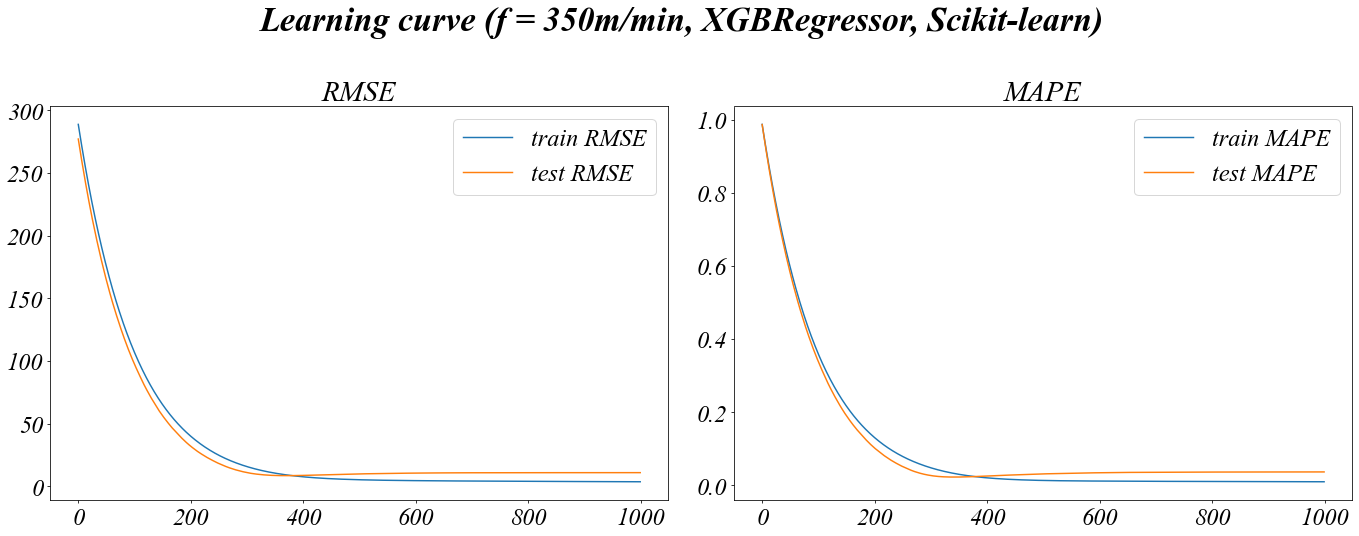

In [26]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 350m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 350_cycle.png")

# ***feed 400 test***

In [27]:
train = pd.concat([feed_300, feed_350, feed_450, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [28]:
X_test = feed_400.iloc[: , 1:]
y_test = feed_400['RMS_CF_max']

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [30]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:285.05813	validation_0-mape:0.98743	validation_1-rmse:293.43819	validation_1-mape:0.98726
[1]	validation_0-rmse:282.22437	validation_0-mape:0.97750	validation_1-rmse:290.43203	validation_1-mape:0.97708
[2]	validation_0-rmse:279.41904	validation_0-mape:0.96768	validation_1-rmse:287.45735	validation_1-mape:0.96701
[3]	validation_0-rmse:276.64183	validation_0-mape:0.95796	validation_1-rmse:284.51135	validation_1-mape:0.95703
[4]	validation_0-rmse:273.89252	validation_0-mape:0.94833	validation_1-rmse:281.59562	validation_1-mape:0.94715
[5]	validation_0-rmse:271.17057	validation_0-mape:0.93880	validation_1-rmse:278.72195	validation_1-mape:0.93739
[6]	validation_0-rmse:268.47484	validation_0-mape:0.92937	validation_1-rmse:275.86280	validation_1-mape:0.92768
[7]	validation_0-rmse:265.80739	validation_0-mape:0.92003	validation_1-rmse:273.04202	validation_1-mape:0.91810
[8]	validation_0-rmse:263.16653	validation_0-mape:0.91078	validation_1-rmse:270.25054	validation_1-mape:

[73]	validation_0-rmse:137.74443	validation_0-mape:0.47194	validation_1-rmse:138.34689	validation_1-mape:0.45962
[74]	validation_0-rmse:136.38495	validation_0-mape:0.46718	validation_1-rmse:136.94619	validation_1-mape:0.45484
[75]	validation_0-rmse:135.03695	validation_0-mape:0.46247	validation_1-rmse:135.56069	validation_1-mape:0.45013
[76]	validation_0-rmse:133.70327	validation_0-mape:0.45781	validation_1-rmse:134.15271	validation_1-mape:0.44534
[77]	validation_0-rmse:132.38381	validation_0-mape:0.45319	validation_1-rmse:132.78423	validation_1-mape:0.44066
[78]	validation_0-rmse:131.07560	validation_0-mape:0.44862	validation_1-rmse:131.37955	validation_1-mape:0.43593
[79]	validation_0-rmse:129.78107	validation_0-mape:0.44410	validation_1-rmse:130.01767	validation_1-mape:0.43130
[80]	validation_0-rmse:128.49960	validation_0-mape:0.43963	validation_1-rmse:128.66932	validation_1-mape:0.42672
[81]	validation_0-rmse:127.23033	validation_0-mape:0.43520	validation_1-rmse:127.35618	validatio

[146]	validation_0-rmse:66.93964	validation_0-mape:0.22524	validation_1-rmse:63.70832	validation_1-mape:0.20587
[147]	validation_0-rmse:66.28405	validation_0-mape:0.22297	validation_1-rmse:62.99140	validation_1-mape:0.20346
[148]	validation_0-rmse:65.63586	validation_0-mape:0.22072	validation_1-rmse:62.30090	validation_1-mape:0.20110
[149]	validation_0-rmse:64.99332	validation_0-mape:0.21850	validation_1-rmse:61.60847	validation_1-mape:0.19874
[150]	validation_0-rmse:64.35824	validation_0-mape:0.21629	validation_1-rmse:60.93711	validation_1-mape:0.19646
[151]	validation_0-rmse:63.72959	validation_0-mape:0.21411	validation_1-rmse:60.27066	validation_1-mape:0.19419
[152]	validation_0-rmse:63.10625	validation_0-mape:0.21196	validation_1-rmse:59.59622	validation_1-mape:0.19189
[153]	validation_0-rmse:62.48877	validation_0-mape:0.20982	validation_1-rmse:58.92558	validation_1-mape:0.18963
[154]	validation_0-rmse:61.87892	validation_0-mape:0.20771	validation_1-rmse:58.27278	validation_1-mape:

[220]	validation_0-rmse:32.59004	validation_0-mape:0.10654	validation_1-rmse:27.67502	validation_1-mape:0.08267
[221]	validation_0-rmse:32.27827	validation_0-mape:0.10548	validation_1-rmse:27.35818	validation_1-mape:0.08155
[222]	validation_0-rmse:31.96969	validation_0-mape:0.10442	validation_1-rmse:27.04474	validation_1-mape:0.08044
[223]	validation_0-rmse:31.66462	validation_0-mape:0.10337	validation_1-rmse:26.71959	validation_1-mape:0.07931
[224]	validation_0-rmse:31.36238	validation_0-mape:0.10233	validation_1-rmse:26.41394	validation_1-mape:0.07823
[225]	validation_0-rmse:31.06348	validation_0-mape:0.10131	validation_1-rmse:26.11181	validation_1-mape:0.07717
[226]	validation_0-rmse:30.76753	validation_0-mape:0.10029	validation_1-rmse:25.81468	validation_1-mape:0.07611
[227]	validation_0-rmse:30.47477	validation_0-mape:0.09929	validation_1-rmse:25.50735	validation_1-mape:0.07504
[228]	validation_0-rmse:30.18498	validation_0-mape:0.09829	validation_1-rmse:25.21342	validation_1-mape:

[294]	validation_0-rmse:16.42489	validation_0-mape:0.05092	validation_1-rmse:12.24277	validation_1-mape:0.02819
[295]	validation_0-rmse:16.28160	validation_0-mape:0.05042	validation_1-rmse:12.12821	validation_1-mape:0.02786
[296]	validation_0-rmse:16.13988	validation_0-mape:0.04993	validation_1-rmse:12.01749	validation_1-mape:0.02754
[297]	validation_0-rmse:15.99987	validation_0-mape:0.04945	validation_1-rmse:11.91406	validation_1-mape:0.02723
[298]	validation_0-rmse:15.86154	validation_0-mape:0.04897	validation_1-rmse:11.81711	validation_1-mape:0.02696
[299]	validation_0-rmse:15.72416	validation_0-mape:0.04850	validation_1-rmse:11.71161	validation_1-mape:0.02666
[300]	validation_0-rmse:15.58784	validation_0-mape:0.04803	validation_1-rmse:11.61337	validation_1-mape:0.02639
[301]	validation_0-rmse:15.45286	validation_0-mape:0.04756	validation_1-rmse:11.51266	validation_1-mape:0.02612
[302]	validation_0-rmse:15.31954	validation_0-mape:0.04710	validation_1-rmse:11.41760	validation_1-mape:

[368]	validation_0-rmse:9.17016	validation_0-mape:0.02593	validation_1-rmse:8.75428	validation_1-mape:0.02214
[369]	validation_0-rmse:9.10842	validation_0-mape:0.02572	validation_1-rmse:8.75381	validation_1-mape:0.02221
[370]	validation_0-rmse:9.04756	validation_0-mape:0.02552	validation_1-rmse:8.75069	validation_1-mape:0.02226
[371]	validation_0-rmse:8.98749	validation_0-mape:0.02532	validation_1-rmse:8.74915	validation_1-mape:0.02231
[372]	validation_0-rmse:8.92819	validation_0-mape:0.02512	validation_1-rmse:8.74850	validation_1-mape:0.02236
[373]	validation_0-rmse:8.86989	validation_0-mape:0.02492	validation_1-rmse:8.74835	validation_1-mape:0.02242
[374]	validation_0-rmse:8.81197	validation_0-mape:0.02473	validation_1-rmse:8.74771	validation_1-mape:0.02247
[375]	validation_0-rmse:8.75500	validation_0-mape:0.02454	validation_1-rmse:8.74784	validation_1-mape:0.02253
[376]	validation_0-rmse:8.69908	validation_0-mape:0.02435	validation_1-rmse:8.74912	validation_1-mape:0.02259
[377]	vali

[443]	validation_0-rmse:6.19756	validation_0-mape:0.01620	validation_1-rmse:9.45669	validation_1-mape:0.02696
[444]	validation_0-rmse:6.17416	validation_0-mape:0.01613	validation_1-rmse:9.46881	validation_1-mape:0.02702
[445]	validation_0-rmse:6.15144	validation_0-mape:0.01606	validation_1-rmse:9.48344	validation_1-mape:0.02708
[446]	validation_0-rmse:6.12868	validation_0-mape:0.01599	validation_1-rmse:9.49882	validation_1-mape:0.02715
[447]	validation_0-rmse:6.10692	validation_0-mape:0.01592	validation_1-rmse:9.51065	validation_1-mape:0.02720
[448]	validation_0-rmse:6.08478	validation_0-mape:0.01585	validation_1-rmse:9.52429	validation_1-mape:0.02726
[449]	validation_0-rmse:6.06233	validation_0-mape:0.01578	validation_1-rmse:9.54005	validation_1-mape:0.02733
[450]	validation_0-rmse:6.04136	validation_0-mape:0.01572	validation_1-rmse:9.55377	validation_1-mape:0.02738
[451]	validation_0-rmse:6.02075	validation_0-mape:0.01565	validation_1-rmse:9.56799	validation_1-mape:0.02744
[452]	vali

[518]	validation_0-rmse:5.08587	validation_0-mape:0.01295	validation_1-rmse:10.29431	validation_1-mape:0.03057
[519]	validation_0-rmse:5.07666	validation_0-mape:0.01293	validation_1-rmse:10.30115	validation_1-mape:0.03061
[520]	validation_0-rmse:5.06810	validation_0-mape:0.01291	validation_1-rmse:10.30875	validation_1-mape:0.03064
[521]	validation_0-rmse:5.05891	validation_0-mape:0.01288	validation_1-rmse:10.31701	validation_1-mape:0.03068
[522]	validation_0-rmse:5.05065	validation_0-mape:0.01286	validation_1-rmse:10.32462	validation_1-mape:0.03070
[523]	validation_0-rmse:5.04141	validation_0-mape:0.01284	validation_1-rmse:10.33408	validation_1-mape:0.03074
[524]	validation_0-rmse:5.03333	validation_0-mape:0.01282	validation_1-rmse:10.34260	validation_1-mape:0.03077
[525]	validation_0-rmse:5.02481	validation_0-mape:0.01279	validation_1-rmse:10.34960	validation_1-mape:0.03081
[526]	validation_0-rmse:5.01720	validation_0-mape:0.01277	validation_1-rmse:10.35514	validation_1-mape:0.03082
[

[592]	validation_0-rmse:4.62190	validation_0-mape:0.01184	validation_1-rmse:10.71590	validation_1-mape:0.03242
[593]	validation_0-rmse:4.61712	validation_0-mape:0.01183	validation_1-rmse:10.72108	validation_1-mape:0.03244
[594]	validation_0-rmse:4.61322	validation_0-mape:0.01182	validation_1-rmse:10.72464	validation_1-mape:0.03246
[595]	validation_0-rmse:4.60911	validation_0-mape:0.01182	validation_1-rmse:10.72821	validation_1-mape:0.03247
[596]	validation_0-rmse:4.60418	validation_0-mape:0.01181	validation_1-rmse:10.72928	validation_1-mape:0.03248
[597]	validation_0-rmse:4.60021	validation_0-mape:0.01180	validation_1-rmse:10.73368	validation_1-mape:0.03250
[598]	validation_0-rmse:4.59670	validation_0-mape:0.01179	validation_1-rmse:10.73783	validation_1-mape:0.03251
[599]	validation_0-rmse:4.59297	validation_0-mape:0.01178	validation_1-rmse:10.74048	validation_1-mape:0.03252
[600]	validation_0-rmse:4.58920	validation_0-mape:0.01177	validation_1-rmse:10.74462	validation_1-mape:0.03254
[

[666]	validation_0-rmse:4.37607	validation_0-mape:0.01135	validation_1-rmse:10.93264	validation_1-mape:0.03333
[667]	validation_0-rmse:4.37346	validation_0-mape:0.01135	validation_1-rmse:10.93162	validation_1-mape:0.03333
[668]	validation_0-rmse:4.37043	validation_0-mape:0.01134	validation_1-rmse:10.93444	validation_1-mape:0.03335
[669]	validation_0-rmse:4.36787	validation_0-mape:0.01133	validation_1-rmse:10.93659	validation_1-mape:0.03335
[670]	validation_0-rmse:4.36492	validation_0-mape:0.01133	validation_1-rmse:10.93867	validation_1-mape:0.03336
[671]	validation_0-rmse:4.36268	validation_0-mape:0.01132	validation_1-rmse:10.93874	validation_1-mape:0.03336
[672]	validation_0-rmse:4.35989	validation_0-mape:0.01132	validation_1-rmse:10.94150	validation_1-mape:0.03338
[673]	validation_0-rmse:4.35710	validation_0-mape:0.01131	validation_1-rmse:10.94393	validation_1-mape:0.03338
[674]	validation_0-rmse:4.35502	validation_0-mape:0.01131	validation_1-rmse:10.94557	validation_1-mape:0.03340
[

[740]	validation_0-rmse:4.19322	validation_0-mape:0.01098	validation_1-rmse:11.00426	validation_1-mape:0.03371
[741]	validation_0-rmse:4.19120	validation_0-mape:0.01098	validation_1-rmse:11.00570	validation_1-mape:0.03372
[742]	validation_0-rmse:4.18926	validation_0-mape:0.01097	validation_1-rmse:11.00628	validation_1-mape:0.03372
[743]	validation_0-rmse:4.18766	validation_0-mape:0.01097	validation_1-rmse:11.00563	validation_1-mape:0.03372
[744]	validation_0-rmse:4.18535	validation_0-mape:0.01096	validation_1-rmse:11.00555	validation_1-mape:0.03372
[745]	validation_0-rmse:4.18303	validation_0-mape:0.01096	validation_1-rmse:11.00680	validation_1-mape:0.03373
[746]	validation_0-rmse:4.18078	validation_0-mape:0.01095	validation_1-rmse:11.00486	validation_1-mape:0.03372
[747]	validation_0-rmse:4.17903	validation_0-mape:0.01095	validation_1-rmse:11.00574	validation_1-mape:0.03373
[748]	validation_0-rmse:4.17720	validation_0-mape:0.01094	validation_1-rmse:11.00592	validation_1-mape:0.03373
[

[814]	validation_0-rmse:4.04567	validation_0-mape:0.01068	validation_1-rmse:11.01216	validation_1-mape:0.03384
[815]	validation_0-rmse:4.04440	validation_0-mape:0.01068	validation_1-rmse:11.01242	validation_1-mape:0.03385
[816]	validation_0-rmse:4.04243	validation_0-mape:0.01068	validation_1-rmse:11.01232	validation_1-mape:0.03385
[817]	validation_0-rmse:4.04104	validation_0-mape:0.01067	validation_1-rmse:11.01175	validation_1-mape:0.03384
[818]	validation_0-rmse:4.03937	validation_0-mape:0.01067	validation_1-rmse:11.01294	validation_1-mape:0.03385
[819]	validation_0-rmse:4.03700	validation_0-mape:0.01066	validation_1-rmse:11.01278	validation_1-mape:0.03385
[820]	validation_0-rmse:4.03525	validation_0-mape:0.01066	validation_1-rmse:11.01416	validation_1-mape:0.03386
[821]	validation_0-rmse:4.03369	validation_0-mape:0.01066	validation_1-rmse:11.01478	validation_1-mape:0.03386
[822]	validation_0-rmse:4.03137	validation_0-mape:0.01065	validation_1-rmse:11.01424	validation_1-mape:0.03385
[

[888]	validation_0-rmse:3.92303	validation_0-mape:0.01041	validation_1-rmse:11.00126	validation_1-mape:0.03386
[889]	validation_0-rmse:3.92107	validation_0-mape:0.01041	validation_1-rmse:11.00044	validation_1-mape:0.03385
[890]	validation_0-rmse:3.91981	validation_0-mape:0.01041	validation_1-rmse:10.99947	validation_1-mape:0.03385
[891]	validation_0-rmse:3.91859	validation_0-mape:0.01040	validation_1-rmse:11.00001	validation_1-mape:0.03385
[892]	validation_0-rmse:3.91719	validation_0-mape:0.01040	validation_1-rmse:11.00116	validation_1-mape:0.03386
[893]	validation_0-rmse:3.91466	validation_0-mape:0.01040	validation_1-rmse:11.00132	validation_1-mape:0.03386
[894]	validation_0-rmse:3.91278	validation_0-mape:0.01039	validation_1-rmse:11.00092	validation_1-mape:0.03386
[895]	validation_0-rmse:3.91147	validation_0-mape:0.01039	validation_1-rmse:11.00013	validation_1-mape:0.03385
[896]	validation_0-rmse:3.91027	validation_0-mape:0.01038	validation_1-rmse:10.99981	validation_1-mape:0.03385
[

[962]	validation_0-rmse:3.80696	validation_0-mape:0.01017	validation_1-rmse:11.00056	validation_1-mape:0.03390
[963]	validation_0-rmse:3.80540	validation_0-mape:0.01016	validation_1-rmse:11.00060	validation_1-mape:0.03390
[964]	validation_0-rmse:3.80427	validation_0-mape:0.01016	validation_1-rmse:11.00025	validation_1-mape:0.03390
[965]	validation_0-rmse:3.80301	validation_0-mape:0.01016	validation_1-rmse:10.99956	validation_1-mape:0.03389
[966]	validation_0-rmse:3.80108	validation_0-mape:0.01016	validation_1-rmse:10.99975	validation_1-mape:0.03390
[967]	validation_0-rmse:3.79861	validation_0-mape:0.01015	validation_1-rmse:10.99873	validation_1-mape:0.03389
[968]	validation_0-rmse:3.79759	validation_0-mape:0.01015	validation_1-rmse:10.99823	validation_1-mape:0.03389
[969]	validation_0-rmse:3.79595	validation_0-mape:0.01015	validation_1-rmse:10.99847	validation_1-mape:0.03389
[970]	validation_0-rmse:3.79476	validation_0-mape:0.01014	validation_1-rmse:10.99772	validation_1-mape:0.03389
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [31]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.7504
Train MAPE: 1.0046
Test RMSE: 10.9932
Test MAPE: 3.3897


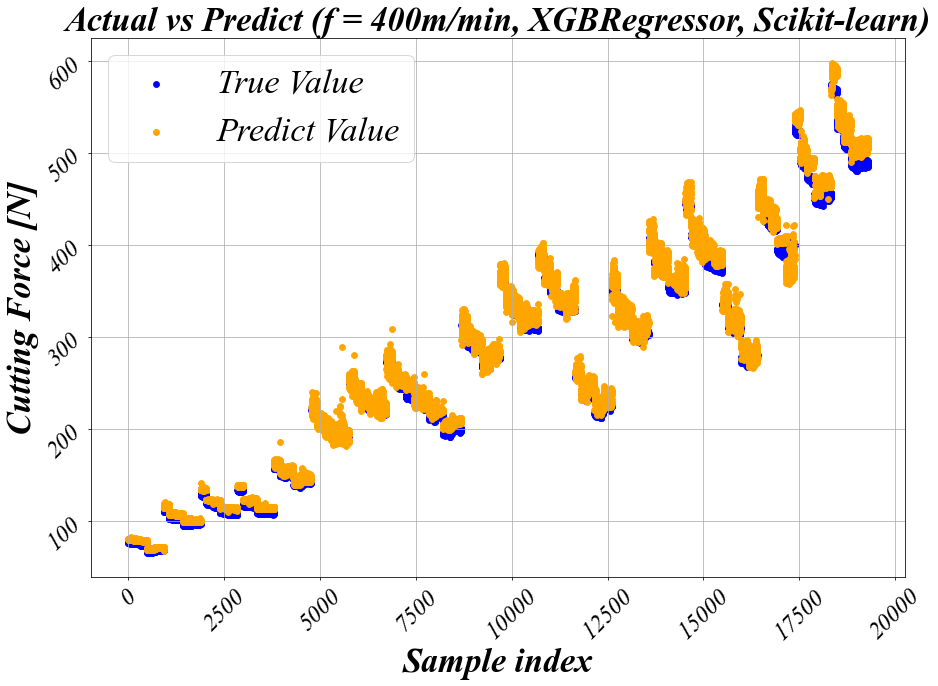

In [32]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 400m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

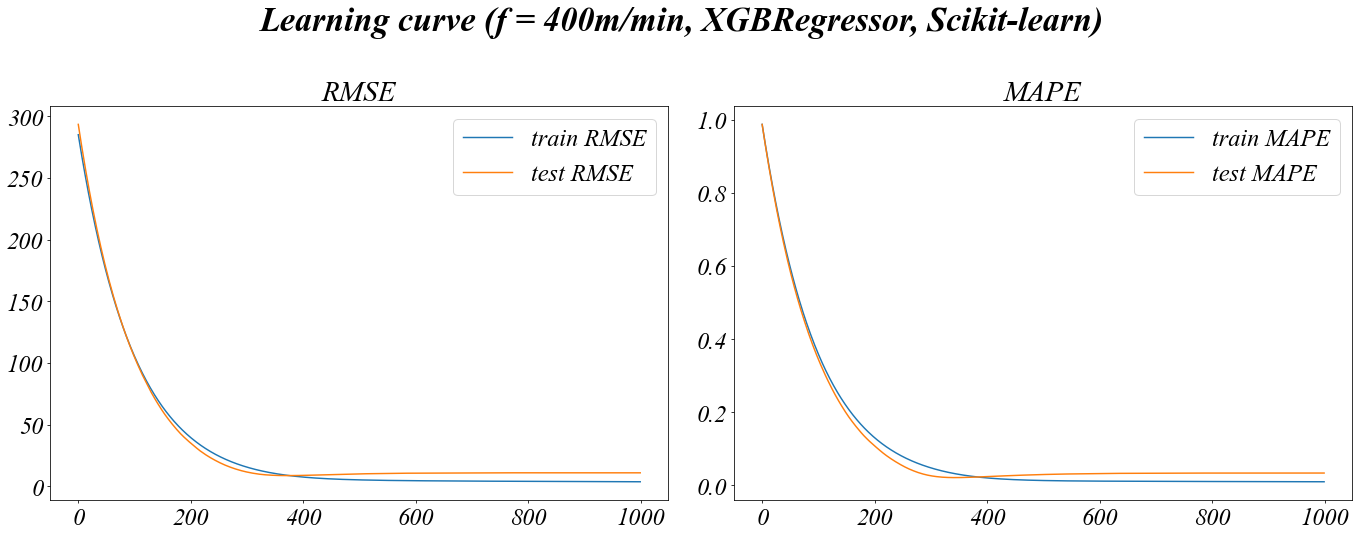

In [33]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 400m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 400_cycle.png")

# ***feed 450 test***

In [34]:
train = pd.concat([feed_300, feed_350, feed_400, feed_500], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [35]:
X_test = feed_450.iloc[: , 1:]
y_test = feed_450['RMS_CF_max']

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:282.41587	validation_0-mape:0.98741	validation_1-rmse:308.77597	validation_1-mape:0.98786
[1]	validation_0-rmse:279.60786	validation_0-mape:0.97749	validation_1-rmse:305.74607	validation_1-mape:0.97815
[2]	validation_0-rmse:276.82806	validation_0-mape:0.96767	validation_1-rmse:302.74337	validation_1-mape:0.96853
[3]	validation_0-rmse:274.07604	validation_0-mape:0.95795	validation_1-rmse:299.77298	validation_1-mape:0.95897
[4]	validation_0-rmse:271.35369	validation_0-mape:0.94832	validation_1-rmse:296.83990	validation_1-mape:0.94954
[5]	validation_0-rmse:268.65643	validation_0-mape:0.93879	validation_1-rmse:293.94336	validation_1-mape:0.94022
[6]	validation_0-rmse:265.98613	validation_0-mape:0.92936	validation_1-rmse:291.05859	validation_1-mape:0.93096
[7]	validation_0-rmse:263.34265	validation_0-mape:0.92003	validation_1-rmse:288.20645	validation_1-mape:0.92179
[8]	validation_0-rmse:260.72530	validation_0-mape:0.91078	validation_1-rmse:285.33528	validation_1-mape:

[73]	validation_0-rmse:136.49781	validation_0-mape:0.47187	validation_1-rmse:150.32872	validation_1-mape:0.47757
[74]	validation_0-rmse:135.14979	validation_0-mape:0.46711	validation_1-rmse:148.85126	validation_1-mape:0.47282
[75]	validation_0-rmse:133.81584	validation_0-mape:0.46240	validation_1-rmse:147.40878	validation_1-mape:0.46818
[76]	validation_0-rmse:132.49506	validation_0-mape:0.45774	validation_1-rmse:145.96337	validation_1-mape:0.46350
[77]	validation_0-rmse:131.18814	validation_0-mape:0.45312	validation_1-rmse:144.54765	validation_1-mape:0.45895
[78]	validation_0-rmse:129.89334	validation_0-mape:0.44854	validation_1-rmse:143.12333	validation_1-mape:0.45430
[79]	validation_0-rmse:128.60738	validation_0-mape:0.44404	validation_1-rmse:141.72855	validation_1-mape:0.44981
[80]	validation_0-rmse:127.33438	validation_0-mape:0.43957	validation_1-rmse:140.34847	validation_1-mape:0.44536
[81]	validation_0-rmse:126.07829	validation_0-mape:0.43513	validation_1-rmse:138.97668	validatio

[146]	validation_0-rmse:66.32480	validation_0-mape:0.22534	validation_1-rmse:73.25473	validation_1-mape:0.22819
[147]	validation_0-rmse:65.67519	validation_0-mape:0.22308	validation_1-rmse:72.48301	validation_1-mape:0.22572
[148]	validation_0-rmse:65.03517	validation_0-mape:0.22082	validation_1-rmse:71.75867	validation_1-mape:0.22342
[149]	validation_0-rmse:64.39925	validation_0-mape:0.21860	validation_1-rmse:71.04712	validation_1-mape:0.22110
[150]	validation_0-rmse:63.76992	validation_0-mape:0.21640	validation_1-rmse:70.34212	validation_1-mape:0.21884
[151]	validation_0-rmse:63.14798	validation_0-mape:0.21421	validation_1-rmse:69.65842	validation_1-mape:0.21663
[152]	validation_0-rmse:62.53039	validation_0-mape:0.21206	validation_1-rmse:68.96556	validation_1-mape:0.21443
[153]	validation_0-rmse:61.91979	validation_0-mape:0.20992	validation_1-rmse:68.27760	validation_1-mape:0.21222
[154]	validation_0-rmse:61.31462	validation_0-mape:0.20780	validation_1-rmse:67.60093	validation_1-mape:

[220]	validation_0-rmse:32.35997	validation_0-mape:0.10647	validation_1-rmse:34.65347	validation_1-mape:0.10392
[221]	validation_0-rmse:32.05451	validation_0-mape:0.10540	validation_1-rmse:34.29635	validation_1-mape:0.10276
[222]	validation_0-rmse:31.75198	validation_0-mape:0.10434	validation_1-rmse:33.93947	validation_1-mape:0.10161
[223]	validation_0-rmse:31.45083	validation_0-mape:0.10330	validation_1-rmse:33.59188	validation_1-mape:0.10048
[224]	validation_0-rmse:31.15281	validation_0-mape:0.10226	validation_1-rmse:33.24256	validation_1-mape:0.09936
[225]	validation_0-rmse:30.85886	validation_0-mape:0.10123	validation_1-rmse:32.90511	validation_1-mape:0.09827
[226]	validation_0-rmse:30.56497	validation_0-mape:0.10022	validation_1-rmse:32.55444	validation_1-mape:0.09713
[227]	validation_0-rmse:30.27405	validation_0-mape:0.09921	validation_1-rmse:32.20394	validation_1-mape:0.09599
[228]	validation_0-rmse:29.98616	validation_0-mape:0.09822	validation_1-rmse:31.85022	validation_1-mape:

[294]	validation_0-rmse:16.33929	validation_0-mape:0.05096	validation_1-rmse:15.68801	validation_1-mape:0.04165
[295]	validation_0-rmse:16.19773	validation_0-mape:0.05047	validation_1-rmse:15.52306	validation_1-mape:0.04111
[296]	validation_0-rmse:16.05772	validation_0-mape:0.04998	validation_1-rmse:15.36744	validation_1-mape:0.04060
[297]	validation_0-rmse:15.91903	validation_0-mape:0.04950	validation_1-rmse:15.20751	validation_1-mape:0.04008
[298]	validation_0-rmse:15.78211	validation_0-mape:0.04902	validation_1-rmse:15.06813	validation_1-mape:0.03961
[299]	validation_0-rmse:15.64663	validation_0-mape:0.04855	validation_1-rmse:14.91287	validation_1-mape:0.03910
[300]	validation_0-rmse:15.51252	validation_0-mape:0.04808	validation_1-rmse:14.76401	validation_1-mape:0.03860
[301]	validation_0-rmse:15.37994	validation_0-mape:0.04761	validation_1-rmse:14.61838	validation_1-mape:0.03812
[302]	validation_0-rmse:15.24907	validation_0-mape:0.04715	validation_1-rmse:14.48251	validation_1-mape:

[368]	validation_0-rmse:9.16453	validation_0-mape:0.02598	validation_1-rmse:8.68504	validation_1-mape:0.02135
[369]	validation_0-rmse:9.10360	validation_0-mape:0.02577	validation_1-rmse:8.64528	validation_1-mape:0.02127
[370]	validation_0-rmse:9.04372	validation_0-mape:0.02557	validation_1-rmse:8.60238	validation_1-mape:0.02119
[371]	validation_0-rmse:8.98466	validation_0-mape:0.02536	validation_1-rmse:8.55892	validation_1-mape:0.02110
[372]	validation_0-rmse:8.92613	validation_0-mape:0.02516	validation_1-rmse:8.52283	validation_1-mape:0.02103
[373]	validation_0-rmse:8.86878	validation_0-mape:0.02496	validation_1-rmse:8.48678	validation_1-mape:0.02096
[374]	validation_0-rmse:8.81194	validation_0-mape:0.02476	validation_1-rmse:8.44851	validation_1-mape:0.02089
[375]	validation_0-rmse:8.75581	validation_0-mape:0.02457	validation_1-rmse:8.41081	validation_1-mape:0.02081
[376]	validation_0-rmse:8.70001	validation_0-mape:0.02438	validation_1-rmse:8.37934	validation_1-mape:0.02075
[377]	vali

[443]	validation_0-rmse:6.22763	validation_0-mape:0.01606	validation_1-rmse:7.66652	validation_1-mape:0.02054
[444]	validation_0-rmse:6.20441	validation_0-mape:0.01599	validation_1-rmse:7.67031	validation_1-mape:0.02056
[445]	validation_0-rmse:6.18171	validation_0-mape:0.01592	validation_1-rmse:7.67607	validation_1-mape:0.02059
[446]	validation_0-rmse:6.15922	validation_0-mape:0.01585	validation_1-rmse:7.68171	validation_1-mape:0.02063
[447]	validation_0-rmse:6.13770	validation_0-mape:0.01578	validation_1-rmse:7.68459	validation_1-mape:0.02065
[448]	validation_0-rmse:6.11582	validation_0-mape:0.01571	validation_1-rmse:7.68740	validation_1-mape:0.02067
[449]	validation_0-rmse:6.09467	validation_0-mape:0.01564	validation_1-rmse:7.69154	validation_1-mape:0.02070
[450]	validation_0-rmse:6.07332	validation_0-mape:0.01558	validation_1-rmse:7.69638	validation_1-mape:0.02073
[451]	validation_0-rmse:6.05227	validation_0-mape:0.01551	validation_1-rmse:7.70271	validation_1-mape:0.02076
[452]	vali

[518]	validation_0-rmse:5.11278	validation_0-mape:0.01272	validation_1-rmse:8.18025	validation_1-mape:0.02262
[519]	validation_0-rmse:5.10384	validation_0-mape:0.01270	validation_1-rmse:8.18780	validation_1-mape:0.02265
[520]	validation_0-rmse:5.09364	validation_0-mape:0.01268	validation_1-rmse:8.19183	validation_1-mape:0.02266
[521]	validation_0-rmse:5.08477	validation_0-mape:0.01265	validation_1-rmse:8.19987	validation_1-mape:0.02269
[522]	validation_0-rmse:5.07634	validation_0-mape:0.01263	validation_1-rmse:8.20756	validation_1-mape:0.02272
[523]	validation_0-rmse:5.06635	validation_0-mape:0.01261	validation_1-rmse:8.21216	validation_1-mape:0.02274
[524]	validation_0-rmse:5.05686	validation_0-mape:0.01259	validation_1-rmse:8.21818	validation_1-mape:0.02276
[525]	validation_0-rmse:5.04808	validation_0-mape:0.01256	validation_1-rmse:8.22391	validation_1-mape:0.02278
[526]	validation_0-rmse:5.03971	validation_0-mape:0.01254	validation_1-rmse:8.22996	validation_1-mape:0.02280
[527]	vali

[593]	validation_0-rmse:4.62098	validation_0-mape:0.01155	validation_1-rmse:8.64523	validation_1-mape:0.02432
[594]	validation_0-rmse:4.61683	validation_0-mape:0.01154	validation_1-rmse:8.64824	validation_1-mape:0.02433
[595]	validation_0-rmse:4.61210	validation_0-mape:0.01153	validation_1-rmse:8.65423	validation_1-mape:0.02435
[596]	validation_0-rmse:4.60770	validation_0-mape:0.01152	validation_1-rmse:8.65902	validation_1-mape:0.02437
[597]	validation_0-rmse:4.60384	validation_0-mape:0.01151	validation_1-rmse:8.66382	validation_1-mape:0.02439
[598]	validation_0-rmse:4.59940	validation_0-mape:0.01150	validation_1-rmse:8.66644	validation_1-mape:0.02440
[599]	validation_0-rmse:4.59526	validation_0-mape:0.01149	validation_1-rmse:8.67036	validation_1-mape:0.02441
[600]	validation_0-rmse:4.59134	validation_0-mape:0.01148	validation_1-rmse:8.67586	validation_1-mape:0.02443
[601]	validation_0-rmse:4.58753	validation_0-mape:0.01148	validation_1-rmse:8.67946	validation_1-mape:0.02444
[602]	vali

[668]	validation_0-rmse:4.35628	validation_0-mape:0.01098	validation_1-rmse:8.91948	validation_1-mape:0.02532
[669]	validation_0-rmse:4.35248	validation_0-mape:0.01097	validation_1-rmse:8.91895	validation_1-mape:0.02532
[670]	validation_0-rmse:4.34958	validation_0-mape:0.01096	validation_1-rmse:8.92116	validation_1-mape:0.02532
[671]	validation_0-rmse:4.34676	validation_0-mape:0.01096	validation_1-rmse:8.92473	validation_1-mape:0.02533
[672]	validation_0-rmse:4.34384	validation_0-mape:0.01095	validation_1-rmse:8.92678	validation_1-mape:0.02534
[673]	validation_0-rmse:4.34132	validation_0-mape:0.01095	validation_1-rmse:8.92996	validation_1-mape:0.02535
[674]	validation_0-rmse:4.33820	validation_0-mape:0.01094	validation_1-rmse:8.93168	validation_1-mape:0.02536
[675]	validation_0-rmse:4.33529	validation_0-mape:0.01093	validation_1-rmse:8.93534	validation_1-mape:0.02537
[676]	validation_0-rmse:4.33258	validation_0-mape:0.01092	validation_1-rmse:8.93838	validation_1-mape:0.02538
[677]	vali

[743]	validation_0-rmse:4.17024	validation_0-mape:0.01058	validation_1-rmse:9.05413	validation_1-mape:0.02581
[744]	validation_0-rmse:4.16806	validation_0-mape:0.01058	validation_1-rmse:9.05489	validation_1-mape:0.02582
[745]	validation_0-rmse:4.16608	validation_0-mape:0.01057	validation_1-rmse:9.05780	validation_1-mape:0.02583
[746]	validation_0-rmse:4.16383	validation_0-mape:0.01057	validation_1-rmse:9.05788	validation_1-mape:0.02583
[747]	validation_0-rmse:4.16203	validation_0-mape:0.01057	validation_1-rmse:9.05891	validation_1-mape:0.02583
[748]	validation_0-rmse:4.16036	validation_0-mape:0.01056	validation_1-rmse:9.06188	validation_1-mape:0.02584
[749]	validation_0-rmse:4.15835	validation_0-mape:0.01056	validation_1-rmse:9.06317	validation_1-mape:0.02585
[750]	validation_0-rmse:4.15646	validation_0-mape:0.01055	validation_1-rmse:9.06757	validation_1-mape:0.02586
[751]	validation_0-rmse:4.15460	validation_0-mape:0.01055	validation_1-rmse:9.06905	validation_1-mape:0.02587
[752]	vali

[818]	validation_0-rmse:4.01961	validation_0-mape:0.01026	validation_1-rmse:9.12296	validation_1-mape:0.02613
[819]	validation_0-rmse:4.01822	validation_0-mape:0.01026	validation_1-rmse:9.12497	validation_1-mape:0.02614
[820]	validation_0-rmse:4.01657	validation_0-mape:0.01025	validation_1-rmse:9.12528	validation_1-mape:0.02614
[821]	validation_0-rmse:4.01420	validation_0-mape:0.01025	validation_1-rmse:9.12491	validation_1-mape:0.02615
[822]	validation_0-rmse:4.01275	validation_0-mape:0.01025	validation_1-rmse:9.12713	validation_1-mape:0.02616
[823]	validation_0-rmse:4.01040	validation_0-mape:0.01024	validation_1-rmse:9.12623	validation_1-mape:0.02616
[824]	validation_0-rmse:4.00856	validation_0-mape:0.01024	validation_1-rmse:9.12820	validation_1-mape:0.02616
[825]	validation_0-rmse:4.00670	validation_0-mape:0.01023	validation_1-rmse:9.12895	validation_1-mape:0.02617
[826]	validation_0-rmse:4.00482	validation_0-mape:0.01023	validation_1-rmse:9.12845	validation_1-mape:0.02617
[827]	vali

[893]	validation_0-rmse:3.88904	validation_0-mape:0.00999	validation_1-rmse:9.16402	validation_1-mape:0.02640
[894]	validation_0-rmse:3.88745	validation_0-mape:0.00998	validation_1-rmse:9.16394	validation_1-mape:0.02639
[895]	validation_0-rmse:3.88601	validation_0-mape:0.00998	validation_1-rmse:9.16425	validation_1-mape:0.02639
[896]	validation_0-rmse:3.88491	validation_0-mape:0.00998	validation_1-rmse:9.16733	validation_1-mape:0.02640
[897]	validation_0-rmse:3.88287	validation_0-mape:0.00997	validation_1-rmse:9.16634	validation_1-mape:0.02640
[898]	validation_0-rmse:3.88054	validation_0-mape:0.00997	validation_1-rmse:9.16552	validation_1-mape:0.02640
[899]	validation_0-rmse:3.87869	validation_0-mape:0.00996	validation_1-rmse:9.16597	validation_1-mape:0.02640
[900]	validation_0-rmse:3.87770	validation_0-mape:0.00996	validation_1-rmse:9.16774	validation_1-mape:0.02642
[901]	validation_0-rmse:3.87590	validation_0-mape:0.00996	validation_1-rmse:9.16678	validation_1-mape:0.02642
[902]	vali

[968]	validation_0-rmse:3.77428	validation_0-mape:0.00974	validation_1-rmse:9.19296	validation_1-mape:0.02655
[969]	validation_0-rmse:3.77328	validation_0-mape:0.00974	validation_1-rmse:9.19365	validation_1-mape:0.02655
[970]	validation_0-rmse:3.77158	validation_0-mape:0.00973	validation_1-rmse:9.19241	validation_1-mape:0.02655
[971]	validation_0-rmse:3.77028	validation_0-mape:0.00973	validation_1-rmse:9.19313	validation_1-mape:0.02655
[972]	validation_0-rmse:3.76796	validation_0-mape:0.00973	validation_1-rmse:9.19072	validation_1-mape:0.02654
[973]	validation_0-rmse:3.76678	validation_0-mape:0.00973	validation_1-rmse:9.19280	validation_1-mape:0.02655
[974]	validation_0-rmse:3.76511	validation_0-mape:0.00972	validation_1-rmse:9.19299	validation_1-mape:0.02655
[975]	validation_0-rmse:3.76354	validation_0-mape:0.00972	validation_1-rmse:9.19518	validation_1-mape:0.02657
[976]	validation_0-rmse:3.76181	validation_0-mape:0.00971	validation_1-rmse:9.19526	validation_1-mape:0.02657
[977]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [38]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.7290
Train MAPE: 0.9649
Test RMSE: 9.1997
Test MAPE: 2.6613


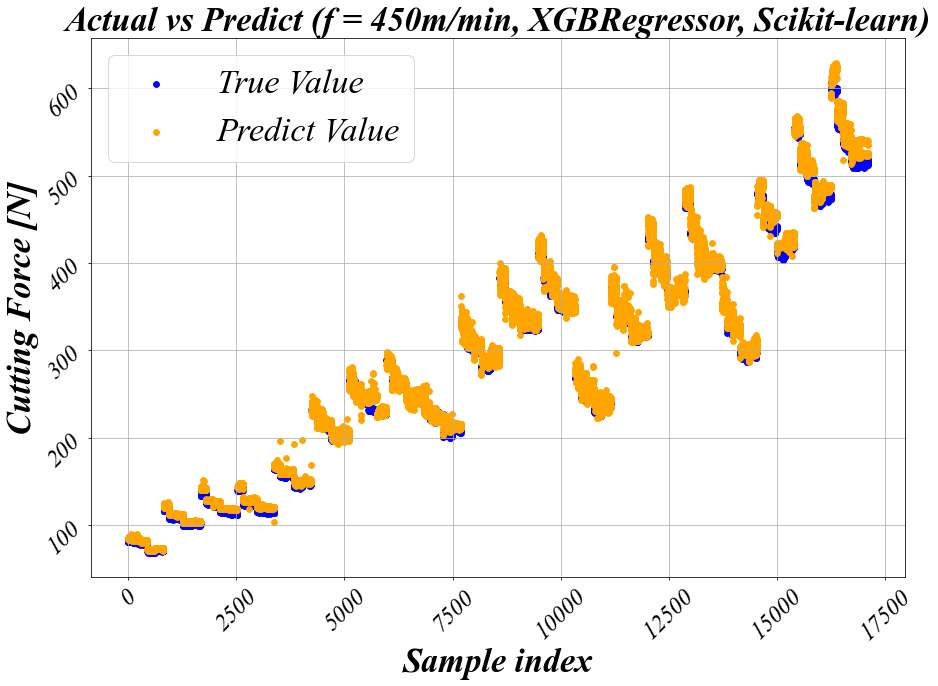

In [39]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 450m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

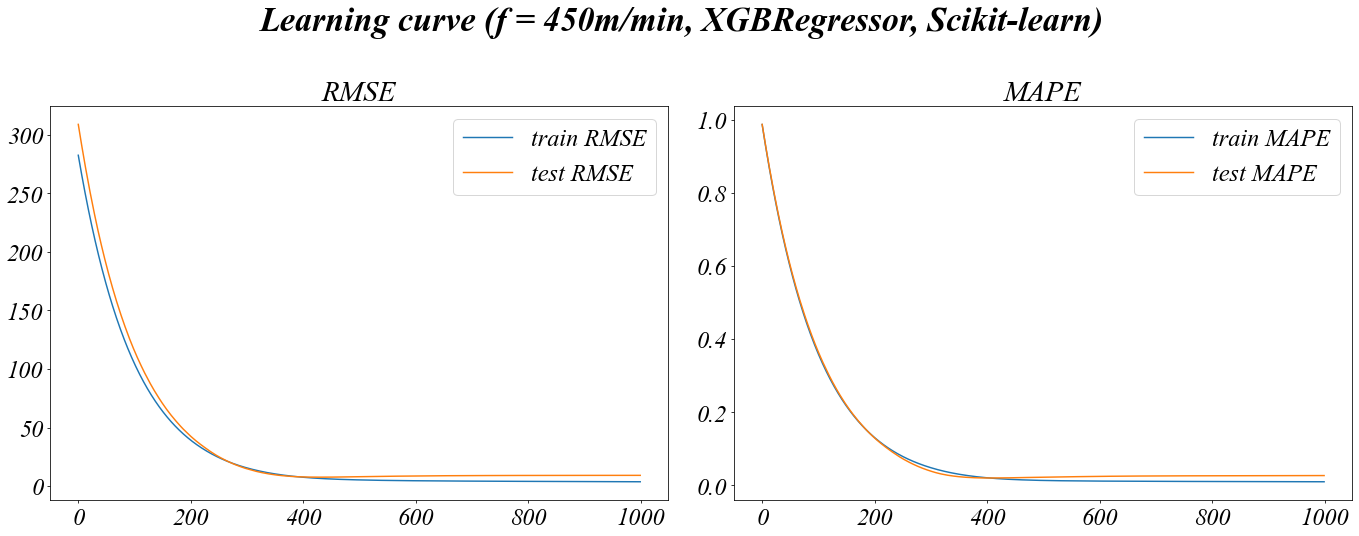

In [40]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 450m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 450_cycle.png")

# ***feed 500 test***

In [41]:
train = pd.concat([feed_300, feed_350, feed_400, feed_450], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [42]:
X_test = feed_500.iloc[: , 1:]
y_test = feed_500['RMS_CF_max']

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [44]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[0]	validation_0-rmse:280.17023	validation_0-mape:0.98740	validation_1-rmse:319.95303	validation_1-mape:0.98847
[1]	validation_0-rmse:277.38282	validation_0-mape:0.97749	validation_1-rmse:316.99930	validation_1-mape:0.97929
[2]	validation_0-rmse:274.62317	validation_0-mape:0.96768	validation_1-rmse:314.06827	validation_1-mape:0.97017
[3]	validation_0-rmse:271.89124	validation_0-mape:0.95797	validation_1-rmse:311.17098	validation_1-mape:0.96117
[4]	validation_0-rmse:269.18666	validation_0-mape:0.94835	validation_1-rmse:308.29297	validation_1-mape:0.95222
[5]	validation_0-rmse:266.50925	validation_0-mape:0.93883	validation_1-rmse:305.45585	validation_1-mape:0.94339
[6]	validation_0-rmse:263.85887	validation_0-mape:0.92940	validation_1-rmse:302.64729	validation_1-mape:0.93465
[7]	validation_0-rmse:261.23478	validation_0-mape:0.92007	validation_1-rmse:299.85853	validation_1-mape:0.92598
[8]	validation_0-rmse:258.63714	validation_0-mape:0.91083	validation_1-rmse:297.09039	validation_1-mape:

[73]	validation_0-rmse:135.31804	validation_0-mape:0.47215	validation_1-rmse:165.16643	validation_1-mape:0.50488
[74]	validation_0-rmse:133.98176	validation_0-mape:0.46739	validation_1-rmse:163.71012	validation_1-mape:0.50024
[75]	validation_0-rmse:132.65273	validation_0-mape:0.46269	validation_1-rmse:162.25721	validation_1-mape:0.49574
[76]	validation_0-rmse:131.33705	validation_0-mape:0.45805	validation_1-rmse:160.81818	validation_1-mape:0.49130
[77]	validation_0-rmse:130.03463	validation_0-mape:0.45345	validation_1-rmse:159.38574	validation_1-mape:0.48685
[78]	validation_0-rmse:128.74528	validation_0-mape:0.44889	validation_1-rmse:157.96139	validation_1-mape:0.48250
[79]	validation_0-rmse:127.46891	validation_0-mape:0.44439	validation_1-rmse:156.56839	validation_1-mape:0.47820
[80]	validation_0-rmse:126.20538	validation_0-mape:0.43993	validation_1-rmse:155.18032	validation_1-mape:0.47394
[81]	validation_0-rmse:124.95959	validation_0-mape:0.43548	validation_1-rmse:153.82711	validatio

[146]	validation_0-rmse:65.64435	validation_0-mape:0.22564	validation_1-rmse:88.11577	validation_1-mape:0.26610
[147]	validation_0-rmse:65.00043	validation_0-mape:0.22337	validation_1-rmse:87.38807	validation_1-mape:0.26384
[148]	validation_0-rmse:64.36333	validation_0-mape:0.22112	validation_1-rmse:86.67110	validation_1-mape:0.26165
[149]	validation_0-rmse:63.73270	validation_0-mape:0.21890	validation_1-rmse:85.96262	validation_1-mape:0.25946
[150]	validation_0-rmse:63.11015	validation_0-mape:0.21669	validation_1-rmse:85.24609	validation_1-mape:0.25724
[151]	validation_0-rmse:62.49175	validation_0-mape:0.21451	validation_1-rmse:84.55055	validation_1-mape:0.25510
[152]	validation_0-rmse:61.87947	validation_0-mape:0.21235	validation_1-rmse:83.86324	validation_1-mape:0.25297
[153]	validation_0-rmse:61.27366	validation_0-mape:0.21021	validation_1-rmse:83.18474	validation_1-mape:0.25090
[154]	validation_0-rmse:60.67379	validation_0-mape:0.20809	validation_1-rmse:82.52932	validation_1-mape:

[220]	validation_0-rmse:31.89935	validation_0-mape:0.10674	validation_1-rmse:49.56838	validation_1-mape:0.14652
[221]	validation_0-rmse:31.59387	validation_0-mape:0.10567	validation_1-rmse:49.21721	validation_1-mape:0.14541
[222]	validation_0-rmse:31.29154	validation_0-mape:0.10461	validation_1-rmse:48.86378	validation_1-mape:0.14433
[223]	validation_0-rmse:30.99225	validation_0-mape:0.10356	validation_1-rmse:48.53275	validation_1-mape:0.14328
[224]	validation_0-rmse:30.69607	validation_0-mape:0.10252	validation_1-rmse:48.17835	validation_1-mape:0.14220
[225]	validation_0-rmse:30.40295	validation_0-mape:0.10149	validation_1-rmse:47.85465	validation_1-mape:0.14117
[226]	validation_0-rmse:30.11289	validation_0-mape:0.10047	validation_1-rmse:47.51342	validation_1-mape:0.14012
[227]	validation_0-rmse:29.82561	validation_0-mape:0.09947	validation_1-rmse:47.18612	validation_1-mape:0.13910
[228]	validation_0-rmse:29.54127	validation_0-mape:0.09847	validation_1-rmse:46.85148	validation_1-mape:

[294]	validation_0-rmse:16.01577	validation_0-mape:0.05086	validation_1-rmse:30.66217	validation_1-mape:0.08815
[295]	validation_0-rmse:15.87348	validation_0-mape:0.05036	validation_1-rmse:30.48329	validation_1-mape:0.08760
[296]	validation_0-rmse:15.73288	validation_0-mape:0.04986	validation_1-rmse:30.31328	validation_1-mape:0.08706
[297]	validation_0-rmse:15.59370	validation_0-mape:0.04938	validation_1-rmse:30.13737	validation_1-mape:0.08652
[298]	validation_0-rmse:15.45592	validation_0-mape:0.04889	validation_1-rmse:29.97314	validation_1-mape:0.08600
[299]	validation_0-rmse:15.31965	validation_0-mape:0.04842	validation_1-rmse:29.79967	validation_1-mape:0.08546
[300]	validation_0-rmse:15.18476	validation_0-mape:0.04794	validation_1-rmse:29.63749	validation_1-mape:0.08494
[301]	validation_0-rmse:15.05148	validation_0-mape:0.04748	validation_1-rmse:29.46423	validation_1-mape:0.08441
[302]	validation_0-rmse:14.91975	validation_0-mape:0.04701	validation_1-rmse:29.30535	validation_1-mape:

[368]	validation_0-rmse:8.80703	validation_0-mape:0.02550	validation_1-rmse:21.47683	validation_1-mape:0.05981
[369]	validation_0-rmse:8.74554	validation_0-mape:0.02529	validation_1-rmse:21.39387	validation_1-mape:0.05955
[370]	validation_0-rmse:8.68493	validation_0-mape:0.02507	validation_1-rmse:21.31021	validation_1-mape:0.05929
[371]	validation_0-rmse:8.62488	validation_0-mape:0.02486	validation_1-rmse:21.22504	validation_1-mape:0.05903
[372]	validation_0-rmse:8.56553	validation_0-mape:0.02466	validation_1-rmse:21.14679	validation_1-mape:0.05879
[373]	validation_0-rmse:8.50693	validation_0-mape:0.02445	validation_1-rmse:21.06506	validation_1-mape:0.05853
[374]	validation_0-rmse:8.44989	validation_0-mape:0.02425	validation_1-rmse:20.98384	validation_1-mape:0.05829
[375]	validation_0-rmse:8.39273	validation_0-mape:0.02405	validation_1-rmse:20.90306	validation_1-mape:0.05805
[376]	validation_0-rmse:8.33607	validation_0-mape:0.02385	validation_1-rmse:20.82721	validation_1-mape:0.05781
[

[442]	validation_0-rmse:5.82066	validation_0-mape:0.01522	validation_1-rmse:17.07393	validation_1-mape:0.04625
[443]	validation_0-rmse:5.79637	validation_0-mape:0.01514	validation_1-rmse:17.03185	validation_1-mape:0.04612
[444]	validation_0-rmse:5.77234	validation_0-mape:0.01506	validation_1-rmse:16.98889	validation_1-mape:0.04599
[445]	validation_0-rmse:5.74822	validation_0-mape:0.01498	validation_1-rmse:16.94872	validation_1-mape:0.04587
[446]	validation_0-rmse:5.72535	validation_0-mape:0.01491	validation_1-rmse:16.90671	validation_1-mape:0.04574
[447]	validation_0-rmse:5.70283	validation_0-mape:0.01483	validation_1-rmse:16.86671	validation_1-mape:0.04561
[448]	validation_0-rmse:5.68038	validation_0-mape:0.01476	validation_1-rmse:16.83126	validation_1-mape:0.04551
[449]	validation_0-rmse:5.65763	validation_0-mape:0.01469	validation_1-rmse:16.79469	validation_1-mape:0.04539
[450]	validation_0-rmse:5.63550	validation_0-mape:0.01461	validation_1-rmse:16.75500	validation_1-mape:0.04527
[

[516]	validation_0-rmse:4.66421	validation_0-mape:0.01162	validation_1-rmse:14.84545	validation_1-mape:0.03943
[517]	validation_0-rmse:4.65453	validation_0-mape:0.01160	validation_1-rmse:14.82365	validation_1-mape:0.03936
[518]	validation_0-rmse:4.64453	validation_0-mape:0.01157	validation_1-rmse:14.80428	validation_1-mape:0.03930
[519]	validation_0-rmse:4.63518	validation_0-mape:0.01154	validation_1-rmse:14.78293	validation_1-mape:0.03923
[520]	validation_0-rmse:4.62585	validation_0-mape:0.01152	validation_1-rmse:14.76500	validation_1-mape:0.03918
[521]	validation_0-rmse:4.61657	validation_0-mape:0.01149	validation_1-rmse:14.74481	validation_1-mape:0.03911
[522]	validation_0-rmse:4.60728	validation_0-mape:0.01146	validation_1-rmse:14.72490	validation_1-mape:0.03905
[523]	validation_0-rmse:4.59807	validation_0-mape:0.01144	validation_1-rmse:14.70506	validation_1-mape:0.03898
[524]	validation_0-rmse:4.58901	validation_0-mape:0.01142	validation_1-rmse:14.68740	validation_1-mape:0.03893
[

[590]	validation_0-rmse:4.16049	validation_0-mape:0.01038	validation_1-rmse:13.73028	validation_1-mape:0.03601
[591]	validation_0-rmse:4.15477	validation_0-mape:0.01036	validation_1-rmse:13.72118	validation_1-mape:0.03599
[592]	validation_0-rmse:4.15063	validation_0-mape:0.01035	validation_1-rmse:13.70574	validation_1-mape:0.03595
[593]	validation_0-rmse:4.14637	validation_0-mape:0.01034	validation_1-rmse:13.69572	validation_1-mape:0.03591
[594]	validation_0-rmse:4.14110	validation_0-mape:0.01033	validation_1-rmse:13.68789	validation_1-mape:0.03590
[595]	validation_0-rmse:4.13655	validation_0-mape:0.01032	validation_1-rmse:13.67782	validation_1-mape:0.03587
[596]	validation_0-rmse:4.13289	validation_0-mape:0.01031	validation_1-rmse:13.66715	validation_1-mape:0.03583
[597]	validation_0-rmse:4.12818	validation_0-mape:0.01030	validation_1-rmse:13.65857	validation_1-mape:0.03580
[598]	validation_0-rmse:4.12440	validation_0-mape:0.01029	validation_1-rmse:13.64829	validation_1-mape:0.03577
[

[664]	validation_0-rmse:3.87912	validation_0-mape:0.00980	validation_1-rmse:13.11772	validation_1-mape:0.03423
[665]	validation_0-rmse:3.87555	validation_0-mape:0.00979	validation_1-rmse:13.11350	validation_1-mape:0.03422
[666]	validation_0-rmse:3.87266	validation_0-mape:0.00978	validation_1-rmse:13.10447	validation_1-mape:0.03420
[667]	validation_0-rmse:3.87019	validation_0-mape:0.00978	validation_1-rmse:13.10060	validation_1-mape:0.03419
[668]	validation_0-rmse:3.86706	validation_0-mape:0.00977	validation_1-rmse:13.09507	validation_1-mape:0.03418
[669]	validation_0-rmse:3.86420	validation_0-mape:0.00977	validation_1-rmse:13.09105	validation_1-mape:0.03417
[670]	validation_0-rmse:3.86124	validation_0-mape:0.00976	validation_1-rmse:13.08193	validation_1-mape:0.03415
[671]	validation_0-rmse:3.85779	validation_0-mape:0.00975	validation_1-rmse:13.07647	validation_1-mape:0.03414
[672]	validation_0-rmse:3.85426	validation_0-mape:0.00975	validation_1-rmse:13.07239	validation_1-mape:0.03412
[

[738]	validation_0-rmse:3.68008	validation_0-mape:0.00938	validation_1-rmse:12.80786	validation_1-mape:0.03348
[739]	validation_0-rmse:3.67820	validation_0-mape:0.00938	validation_1-rmse:12.80589	validation_1-mape:0.03348
[740]	validation_0-rmse:3.67535	validation_0-mape:0.00938	validation_1-rmse:12.80319	validation_1-mape:0.03347
[741]	validation_0-rmse:3.67237	validation_0-mape:0.00937	validation_1-rmse:12.80173	validation_1-mape:0.03346
[742]	validation_0-rmse:3.67047	validation_0-mape:0.00936	validation_1-rmse:12.80002	validation_1-mape:0.03346
[743]	validation_0-rmse:3.66850	validation_0-mape:0.00936	validation_1-rmse:12.79534	validation_1-mape:0.03345
[744]	validation_0-rmse:3.66675	validation_0-mape:0.00936	validation_1-rmse:12.79340	validation_1-mape:0.03344
[745]	validation_0-rmse:3.66498	validation_0-mape:0.00935	validation_1-rmse:12.78713	validation_1-mape:0.03343
[746]	validation_0-rmse:3.66288	validation_0-mape:0.00935	validation_1-rmse:12.78533	validation_1-mape:0.03343
[

[812]	validation_0-rmse:3.52685	validation_0-mape:0.00906	validation_1-rmse:12.63670	validation_1-mape:0.03309
[813]	validation_0-rmse:3.52469	validation_0-mape:0.00906	validation_1-rmse:12.63539	validation_1-mape:0.03309
[814]	validation_0-rmse:3.52246	validation_0-mape:0.00906	validation_1-rmse:12.63437	validation_1-mape:0.03309
[815]	validation_0-rmse:3.52085	validation_0-mape:0.00905	validation_1-rmse:12.63299	validation_1-mape:0.03308
[816]	validation_0-rmse:3.51925	validation_0-mape:0.00905	validation_1-rmse:12.62987	validation_1-mape:0.03308
[817]	validation_0-rmse:3.51690	validation_0-mape:0.00904	validation_1-rmse:12.63091	validation_1-mape:0.03308
[818]	validation_0-rmse:3.51565	validation_0-mape:0.00904	validation_1-rmse:12.63010	validation_1-mape:0.03308
[819]	validation_0-rmse:3.51420	validation_0-mape:0.00904	validation_1-rmse:12.62706	validation_1-mape:0.03307
[820]	validation_0-rmse:3.51271	validation_0-mape:0.00903	validation_1-rmse:12.62369	validation_1-mape:0.03307
[

[886]	validation_0-rmse:3.39382	validation_0-mape:0.00880	validation_1-rmse:12.52258	validation_1-mape:0.03291
[887]	validation_0-rmse:3.39206	validation_0-mape:0.00879	validation_1-rmse:12.52290	validation_1-mape:0.03291
[888]	validation_0-rmse:3.38960	validation_0-mape:0.00879	validation_1-rmse:12.52142	validation_1-mape:0.03291
[889]	validation_0-rmse:3.38821	validation_0-mape:0.00878	validation_1-rmse:12.51897	validation_1-mape:0.03291
[890]	validation_0-rmse:3.38672	validation_0-mape:0.00878	validation_1-rmse:12.51757	validation_1-mape:0.03291
[891]	validation_0-rmse:3.38553	validation_0-mape:0.00878	validation_1-rmse:12.51636	validation_1-mape:0.03291
[892]	validation_0-rmse:3.38392	validation_0-mape:0.00878	validation_1-rmse:12.51627	validation_1-mape:0.03291
[893]	validation_0-rmse:3.38270	validation_0-mape:0.00877	validation_1-rmse:12.51411	validation_1-mape:0.03290
[894]	validation_0-rmse:3.37984	validation_0-mape:0.00877	validation_1-rmse:12.51243	validation_1-mape:0.03291
[

[960]	validation_0-rmse:3.27981	validation_0-mape:0.00856	validation_1-rmse:12.44256	validation_1-mape:0.03283
[961]	validation_0-rmse:3.27869	validation_0-mape:0.00856	validation_1-rmse:12.44176	validation_1-mape:0.03282
[962]	validation_0-rmse:3.27661	validation_0-mape:0.00856	validation_1-rmse:12.44164	validation_1-mape:0.03283
[963]	validation_0-rmse:3.27548	validation_0-mape:0.00856	validation_1-rmse:12.44242	validation_1-mape:0.03283
[964]	validation_0-rmse:3.27452	validation_0-mape:0.00855	validation_1-rmse:12.44150	validation_1-mape:0.03282
[965]	validation_0-rmse:3.27246	validation_0-mape:0.00855	validation_1-rmse:12.44073	validation_1-mape:0.03283
[966]	validation_0-rmse:3.27116	validation_0-mape:0.00855	validation_1-rmse:12.44059	validation_1-mape:0.03282
[967]	validation_0-rmse:3.26898	validation_0-mape:0.00854	validation_1-rmse:12.44019	validation_1-mape:0.03282
[968]	validation_0-rmse:3.26756	validation_0-mape:0.00854	validation_1-rmse:12.43996	validation_1-mape:0.03282
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 3.2233
Train MAPE: 0.8457
Test RMSE: 12.4246
Test MAPE: 3.2830


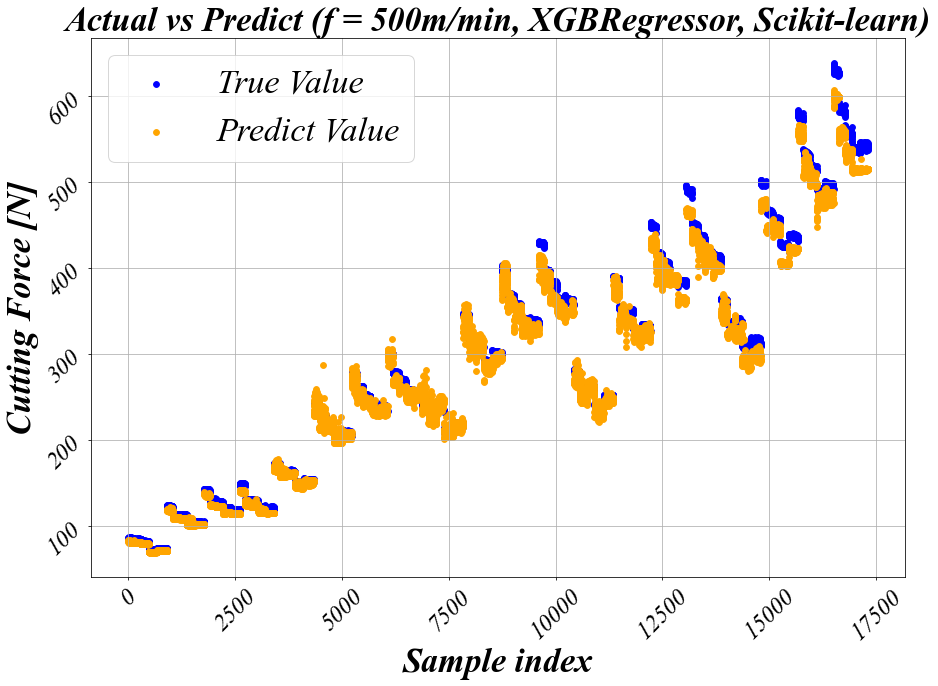

In [46]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (f = 500m/min, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

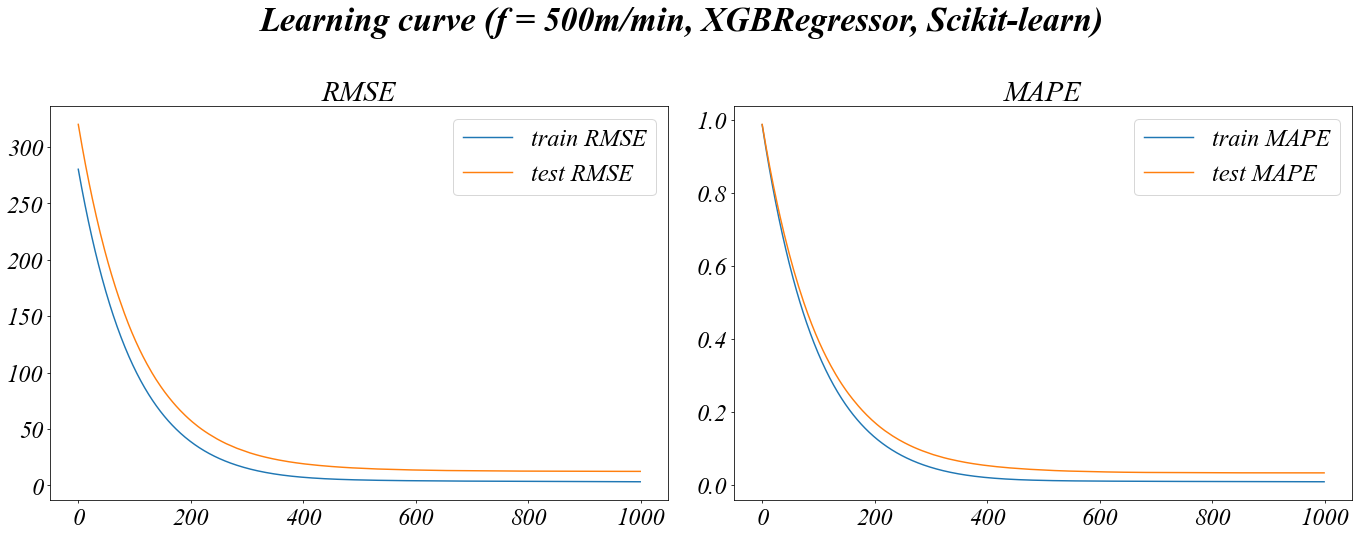

In [47]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (f = 500m/min, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve feed 500_cycle.png")